## Creating datasets for analysis 




In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from darts import TimeSeries

# Load the data
df = pd.read_excel('PivotGrid-2.xls', header=[0, 1, 2])

# Select the desired variables
variables = ['Boerenkaas', 'Boter', 'Melk, gemiddeld vet']
selected_data = df.loc[:, (slice(None), slice(None), variables)]

# Melt the dataframe to long format
melted_data = selected_data.melt(ignore_index=False)
melted_data.reset_index(inplace=True)

# Clean up column names
melted_data.columns = ['Year', 'Month', 'Variable', 'Value']

# Convert Year and Month to datetime
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')

# Pivot the data to wide format
final_data = melted_data.pivot(index='Date', columns='Variable', values='Value')

# Sort by date
final_data.sort_index(inplace=True)

# Convert to float
for col in final_data.columns:
    final_data[col] = final_data[col].astype(float)

# Create Darts TimeSeries
ts_dict = {}
for col in final_data.columns:
    ts_dict[col] = TimeSeries.from_dataframe(final_data, value_cols=col)

print(final_data.head())
print(ts_dict.keys())

KeyError: 'Boter'

In [61]:
df = pd.read_excel('PivotGrid-2.xls', header=[1]) #index_col)
df = df.drop(columns=['Unnamed: 2'])
# Replace 'column_name' with the name of your column
df = df.dropna(subset=['Unnamed: 1'])

df = df[df['Unnamed: 0'].isin(["Boerenkaas", "Boter", "Melk, gemiddeld vet"])]
df

,Unnamed: 0,Unnamed: 1,December,November,Oktober,September,Augustus,Juli,Juni,Mei,...,Oktober.18,September.18,Augustus.18,Juli.18,Juni.18,Mei.18,April.18,Maart.18,Februari.18,Januari.18
1,Boerenkaas,euro/kg,5.05,5.05,5.05,5.05,4.90,4.90,4.90,4.90,...,4.10,3.95,3.75,3.70,3.85,3.95,3.90,4.05,4.10,4.10
3,Boter,euro/100kg,414.50,425.75,455.00,533.75,547.00,542.00,601.00,594.20,...,336.00,335.00,328.00,323.50,314.50,306.50,301.00,298.50,297.50,301.50
13,"Melk, gemiddeld vet",euro/100kg,36.66,36.80,37.47,36.66,35.45,35.33,33.96,33.65,...,35.72,35.72,35.73,30.28,29.72,29.61,29.69,29.61,30.47,31.55


In [58]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'December', 'November', 'Oktober',
       'September', 'Augustus', 'Juli', 'Juni', 'Mei',
       ...
       'Oktober.18', 'September.18', 'Augustus.18', 'Juli.18', 'Juni.18',
       'Mei.18', 'April.18', 'Maart.18', 'Februari.18', 'Januari.18'],
      dtype='object', length=248)


In [59]:
# Select the specific rows from 'Unnamed: 0' column
selected_rows = df[df['Unnamed: 0'].isin(["Boerenkaas", "Boter", "Melk, gemiddeld vet"])]

# If you want to include the 'Unnamed: 0' column in the result:
selected_df = selected_rows

# If you want to exclude the 'Unnamed: 0' column:
# selected_df = selected_rows.drop('Unnamed: 0', axis=1)

# Reset the index if needed
selected_df = selected_df.reset_index(drop=True)

In [60]:
selected_df

,Unnamed: 0,Unnamed: 1,December,November,Oktober,September,Augustus,Juli,Juni,Mei,...,Oktober.18,September.18,Augustus.18,Juli.18,Juni.18,Mei.18,April.18,Maart.18,Februari.18,Januari.18
0,Boerenkaas,euro/kg,5.05,5.05,5.05,5.05,4.90,4.90,4.90,4.90,...,4.10,3.95,3.75,3.70,3.85,3.95,3.90,4.05,4.10,4.10
1,Boter,euro/100kg,414.50,425.75,455.00,533.75,547.00,542.00,601.00,594.20,...,336.00,335.00,328.00,323.50,314.50,306.50,301.00,298.50,297.50,301.50
2,"Melk, gemiddeld vet",euro/100kg,36.66,36.80,37.47,36.66,35.45,35.33,33.96,33.65,...,35.72,35.72,35.73,30.28,29.72,29.61,29.69,29.61,30.47,31.55


In [33]:
df = pd.read_excel('PivotGrid-2.xls', header=[1])
df = df.dropna()
df


,Unnamed: 0
0,Boerenkaas
1,Boerenkaas
2,Boter
3,Boter
4,Leasemelk
5,Leasemelk
6,Magere verstuivingsmelkpoeder
7,Magere verstuivingsmelkpoeder
8,"Magere verstuivingsmelkpoeder, veevoeder"
9,"Magere verstuivingsmelkpoeder, veevoeder"


In [ ]:
df = df.dropna()

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from darts import TimeSeries

# Load the data
df = pd.read_excel('PivotGrid-2.xls')
df

,Unnamed: 0,Unnamed: 1,2018,2018.1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248
0,NaN,NaN,NaN,December,November,Oktober,September,Augustus,Juli,Juni,...,Oktober,September,Augustus,Juli,Juni,Mei,April,Maart,Februari,Januari
1,Boerenkaas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boerenkaas,euro/kg,NaN,5.05,5.05,5.05,5.05,4.9,4.9,4.9,...,4.1,3.95,3.75,3.7,3.85,3.95,3.9,4.05,4.1,4.1
3,Boter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boter,euro/100kg,NaN,414.5,425.75,455,533.75,547,542,601,...,336,335,328,323.5,314.5,306.5,301,298.5,297.5,301.5
5,Leasemelk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Leasemelk,euro/kg vet,NaN,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Magere verstuivingsmelkpoeder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Magere verstuivingsmelkpoeder,euro/100kg,NaN,170.5,161.25,154.8,160.5,154.8,147,158.25,...,274.5,276,278.5,272.5,261,236.5,224,222.5,222,219.5
9,"Magere verstuivingsmelkpoeder, veevoeder",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the data
df = pd.read_excel('PivotGrid-2.xls', header=None)

def is_year(value):
    try:
        year = int(float(str(value).split('.')[0]))
        return 1900 <= year <= 2100
    except:
        return False

def clean_data(df):
    # Initialize lists to store cleaned data
    products = []
    units = []
    dates = []
    values = []

    # Identify the year columns
    year_columns = [col for col in df.iloc[0] if is_year(col)]
    year_indices = [df.columns.get_loc(col) for col in year_columns]

    # Process each row
    for _, row in df.iterrows():
        product = row.iloc[0]
        unit = row.iloc[1]
        
        if pd.notna(product) and pd.notna(unit) and product in ["Boerenkaas", "Boter", "Melk, gemiddeld vet"]:
            for year_idx, year in zip(year_indices, year_columns):
                for month in range(12):
                    if year_idx + month < len(row):
                        value = row.iloc[year_idx + month]
                        if pd.notna(value):
                            products.append(product)
                            units.append(unit)
                            try:
                                dates.append(pd.to_datetime(f"{int(float(str(year).split('.')[0]))}-{month+1:02d}-01"))
                            except:
                                continue  # Skip this date if it's invalid
                            values.append(value)

    # Create a new DataFrame from the processed data
    cleaned_df = pd.DataFrame({
        'Product': products,
        'Unit': units,
        'Date': dates,
        'Value': values
    })

    # Convert Value to numeric, replacing ',' with '.' for decimal points if it's a string
    cleaned_df['Value'] = pd.to_numeric(cleaned_df['Value'].astype(str).str.replace(',', '.'), errors='coerce')

    # Sort the dataframe
    cleaned_df = cleaned_df.sort_values(['Product', 'Date'])

    # Reset index
    cleaned_df = cleaned_df.reset_index(drop=True)

    return cleaned_df

# Clean the data
cleaned_df = clean_data(df)

# Display the first few rows of the cleaned dataframe
print(cleaned_df.head(15))

# Save the cleaned data to a new Excel file
cleaned_df.to_excel('cleaned_dairy_data.xlsx', index=False)

KeyError: 2018.0

In [11]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_excel('PivotGrid-2.xls')

# Function to melt the dataframe
def melt_dataframe(df):
    # Melt the dataframe
    melted = pd.melt(df, id_vars=['Unnamed: 0', 'Unnamed: 1'], var_name='Date', value_name='Value')
    
    # Clean up the column names
    melted.columns = ['Product', 'Unit', 'Date', 'Value']
    
    return melted

# Function to extract date from the 'Date' column
def extract_date(date_str):
    try:
        year = int(float(date_str))
        month = 1  # Default to January if only year is given
    except ValueError:
        # If conversion to float fails, it's a string like 'December'
        months = {'Januari': 1, 'Februari': 2, 'Maart': 3, 'April': 4, 'Mei': 5, 'Juni': 6,
                  'Juli': 7, 'Augustus': 8, 'September': 9, 'Oktober': 10, 'November': 11, 'December': 12}
        month = months.get(date_str, 1)  # Default to 1 if month not found
        year = df.columns[2]  # Assume the first year (2018) if it's a month name

    return pd.to_datetime(f'{year}-{month:02d}-01')

# Main cleaning function
def clean_data(df):
    # Melt the dataframe
    melted = melt_dataframe(df)
    
    # Extract dates
    melted['Date'] = melted['Date'].apply(extract_date)
    
    # Filter for the desired products
    products = ["Boerenkaas", "Boter", "Melk, gemiddeld vet"]
    filtered = melted[melted['Product'].isin(products)]
    
    # Remove rows where Unit is NaN (these are the header rows for each product)
    filtered = filtered.dropna(subset=['Unit'])
    
    # Sort the dataframe
    filtered = filtered.sort_values(['Product', 'Date'])
    
    # Reset index
    filtered = filtered.reset_index(drop=True)
    
    return filtered

# Clean the data
cleaned_df = clean_data(df)

# Display the first few rows of the cleaned dataframe
print(cleaned_df.head(15))
df
# # Save the cleaned data to a new Excel file
# cleaned_df.to_excel('cleaned_dairy_data.xlsx', index=False)

       Product     Unit       Date Value
0   Boerenkaas  euro/kg 2000-01-01   NaN
1   Boerenkaas  euro/kg 2000-01-01   4.1
2   Boerenkaas  euro/kg 2001-01-01   NaN
3   Boerenkaas  euro/kg 2001-01-01   4.5
4   Boerenkaas  euro/kg 2002-01-01   NaN
5   Boerenkaas  euro/kg 2002-01-01  4.35
6   Boerenkaas  euro/kg 2003-01-01   NaN
7   Boerenkaas  euro/kg 2003-01-01     4
8   Boerenkaas  euro/kg 2004-01-01   NaN
9   Boerenkaas  euro/kg 2004-01-01  3.75
10  Boerenkaas  euro/kg 2005-01-01   NaN
11  Boerenkaas  euro/kg 2005-01-01   3.9
12  Boerenkaas  euro/kg 2006-01-01   NaN
13  Boerenkaas  euro/kg 2006-01-01     4
14  Boerenkaas  euro/kg 2007-01-01   NaN


,Unnamed: 0,Unnamed: 1,2018,2018.1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248
0,NaN,NaN,NaN,December,November,Oktober,September,Augustus,Juli,Juni,...,Oktober,September,Augustus,Juli,Juni,Mei,April,Maart,Februari,Januari
1,Boerenkaas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boerenkaas,euro/kg,NaN,5.05,5.05,5.05,5.05,4.9,4.9,4.9,...,4.1,3.95,3.75,3.7,3.85,3.95,3.9,4.05,4.1,4.1
3,Boter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boter,euro/100kg,NaN,414.5,425.75,455,533.75,547,542,601,...,336,335,328,323.5,314.5,306.5,301,298.5,297.5,301.5
5,Leasemelk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Leasemelk,euro/kg vet,NaN,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Magere verstuivingsmelkpoeder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Magere verstuivingsmelkpoeder,euro/100kg,NaN,170.5,161.25,154.8,160.5,154.8,147,158.25,...,274.5,276,278.5,272.5,261,236.5,224,222.5,222,219.5
9,"Magere verstuivingsmelkpoeder, veevoeder",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_df

,Product,Unit,Date,Value
0,Boerenkaas,euro/kg,2000-01-01,NaN
1,Boerenkaas,euro/kg,2000-01-01,4.1
2,Boerenkaas,euro/kg,2001-01-01,NaN
3,Boerenkaas,euro/kg,2001-01-01,4.5
4,Boerenkaas,euro/kg,2002-01-01,NaN
...,...,...,...,...
736,"Melk, gemiddeld vet",euro/100kg,2018-01-01,29.61
737,"Melk, gemiddeld vet",euro/100kg,2018-01-01,29.69
738,"Melk, gemiddeld vet",euro/100kg,2018-01-01,29.61
739,"Melk, gemiddeld vet",euro/100kg,2018-01-01,30.47


In [10]:
import numpy as np
import pandas as pd
from darts import TimeSeries

np.random.seed(42)
default_float = np.float32

# Generate synthetic data
n_samples = 1500
dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')

# Create independent variables
X1 = np.random.normal(0, 3, n_samples).astype(default_float)
X2 = np.random.normal(0, 4, n_samples).astype(default_float)
X3 = np.random.normal(0, 1, n_samples).astype(default_float)
X4 = np.random.normal(0, 7, n_samples).astype(default_float)
X5 = np.random.normal(0, 1, n_samples).astype(default_float)

# Generate target variable Y with linear dependencies on X (no lags)
Y = (2.0 * X1 +  # Strong positive influence
     6 * X2 +  # Moderate positive influence
     -3.0 * X3 +  # Moderate negative influence
     2 * X4 +  # Weak positive influence
     0.0 * X5  )   # No influence (noise variable) 
     #0.5 * np.random.normal(0, 1, n_samples)).astype(default_float)  # Add some noise

# Create DataFrame
df = pd.DataFrame({
    'timestamp': dates,
    'Y': Y,
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X4': X4,
    'X5': X5
})

# Convert to TimeSeries objects
target = TimeSeries.from_dataframe(df, 'timestamp', 'Y')
covariates = TimeSeries.from_dataframe(df, 'timestamp', ['X1', 'X2', 'X3', 'X4', 'X5'])

# Split into train and test sets
train_test_split = int(0.9 * len(target))
train_target, test_target = target[:train_test_split], target[train_test_split:]
train_covariates, test_covariates = covariates[:train_test_split], covariates[train_test_split:]

print("True relationships:")
#print("Y = 2.0 * X1 + 1.5 * X2 - 1.0 * X3 + 0.5 * X4 + 0.0 * X5 + noise")

True relationships:


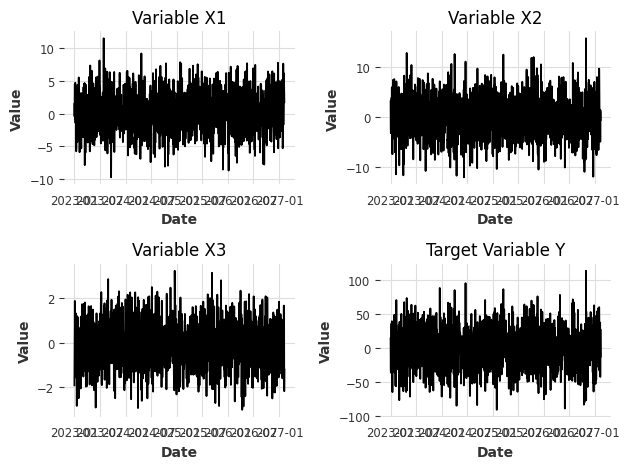

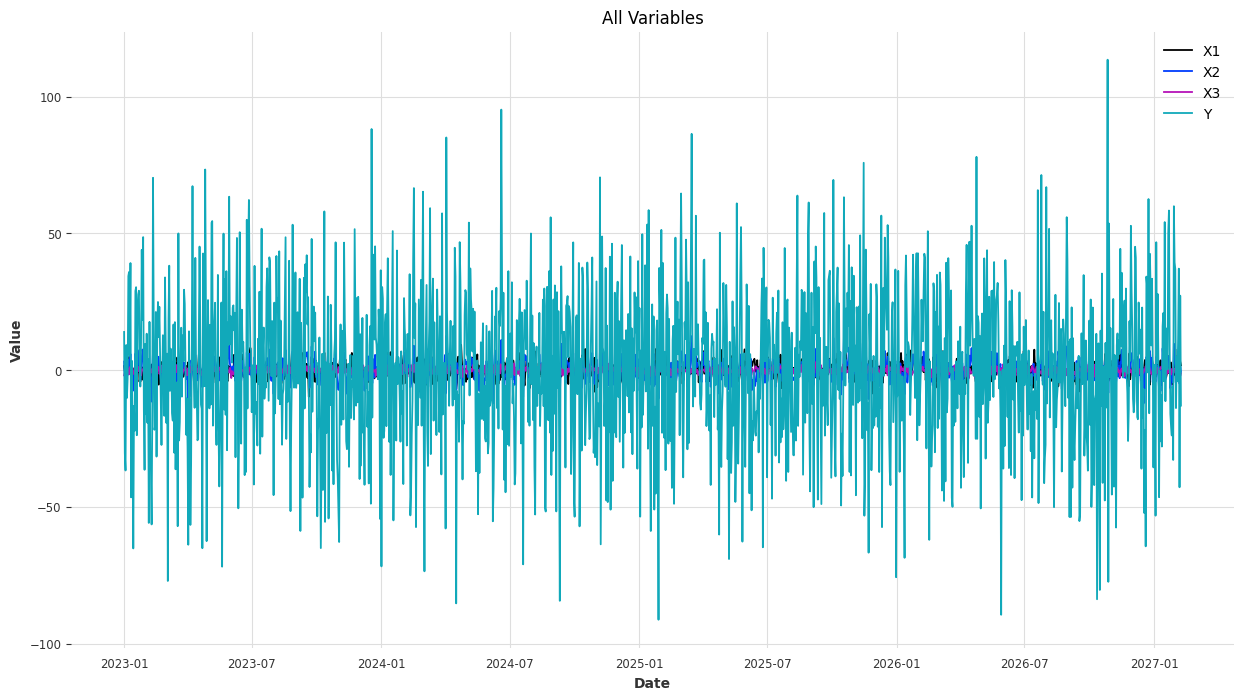

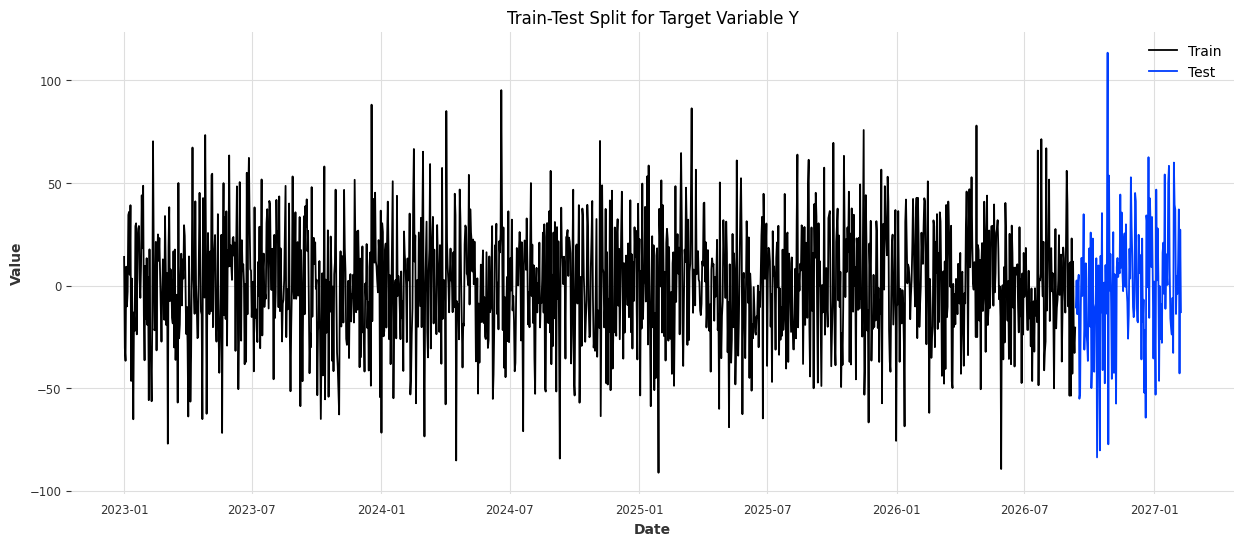

In [11]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt



# Plot each input variable
for i, col in enumerate(['X1', 'X2', 'X3']):
    plt.subplot(2, 2, i+1)
    plt.plot(dates, df[col])
    plt.title(f'Variable {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

# Plot the target variable
plt.subplot(2, 2, 4)
plt.plot(dates, df['Y'])
plt.title('Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot all variables together
plt.figure(figsize=(15, 8))
for col in ['X1', 'X2', 'X3', 'Y']:
    plt.plot(dates, df[col], label=col)
plt.title('All Variables')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot train and test split for Y
plt.figure(figsize=(15, 6))
plt.plot(dates[:train_test_split], df['Y'][:train_test_split], label='Train')
plt.plot(dates[train_test_split:], df['Y'][train_test_split:], label='Test')
plt.title('Train-Test Split for Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

True relationships:
Y = 1.0 * X1 + 0.5 * X2 + 0.0 * X3


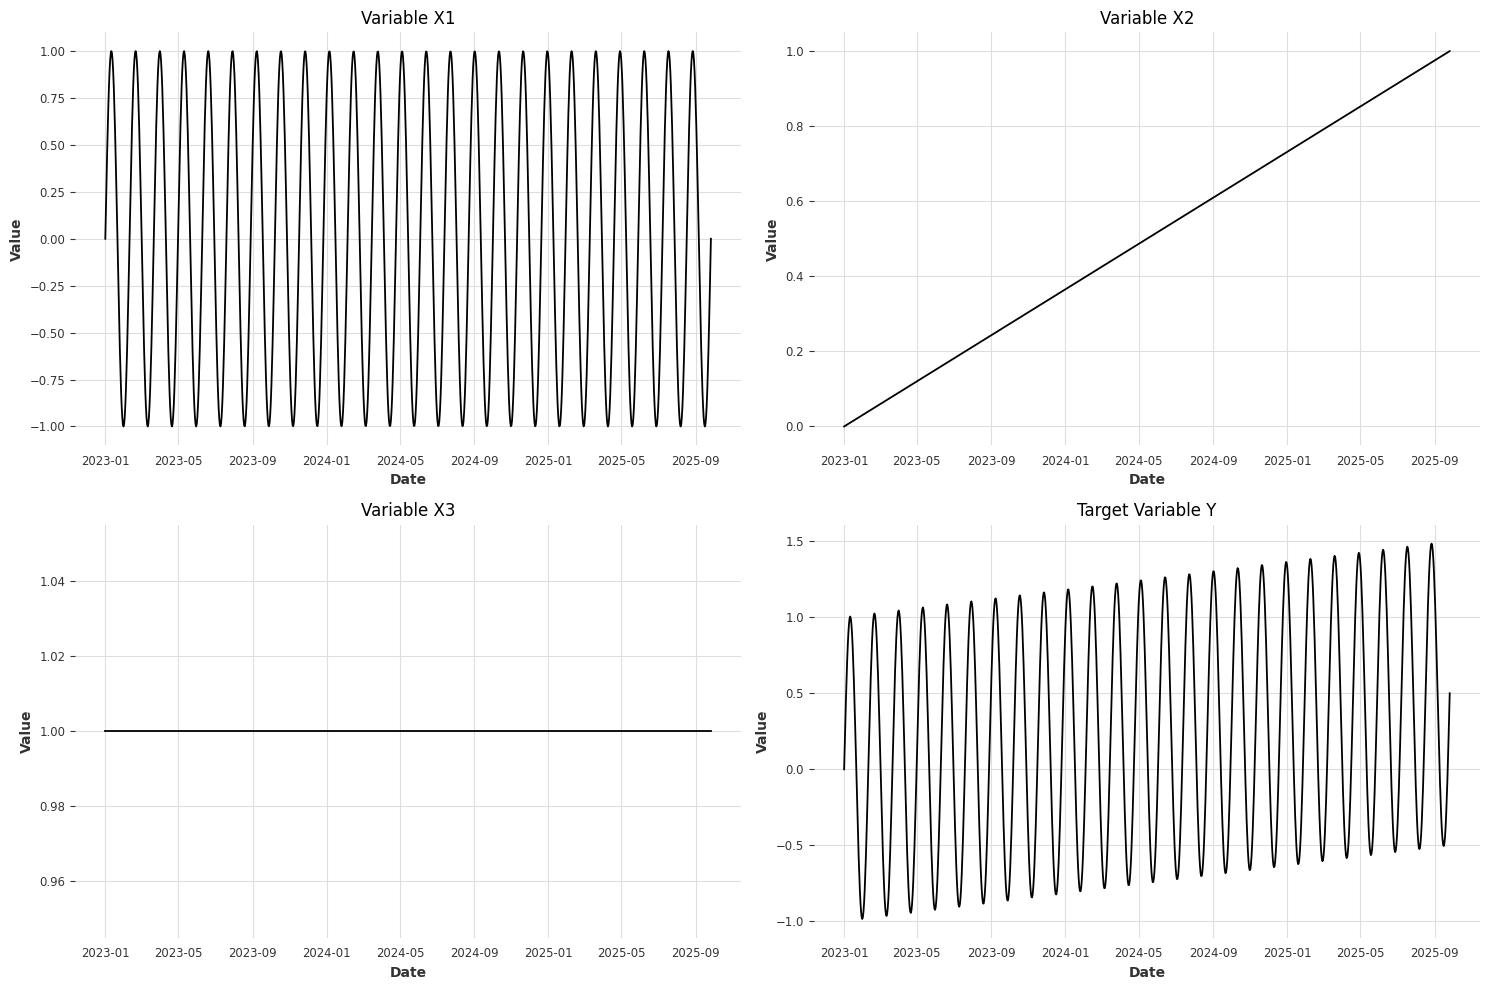

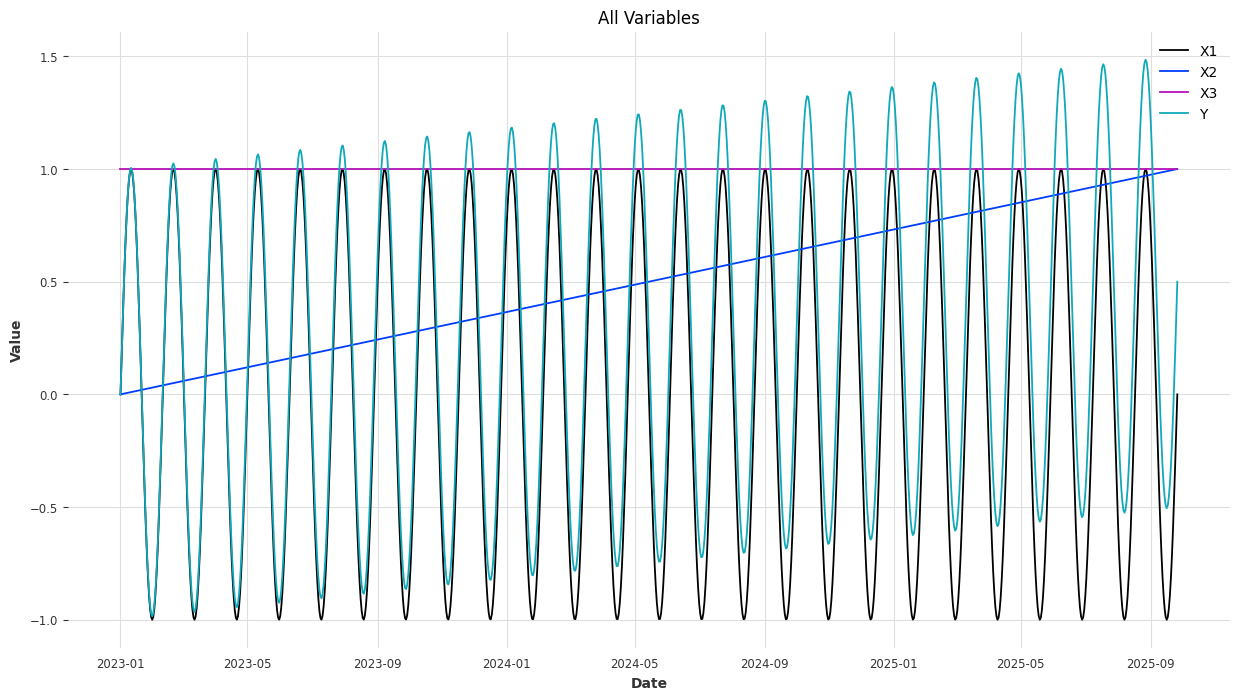

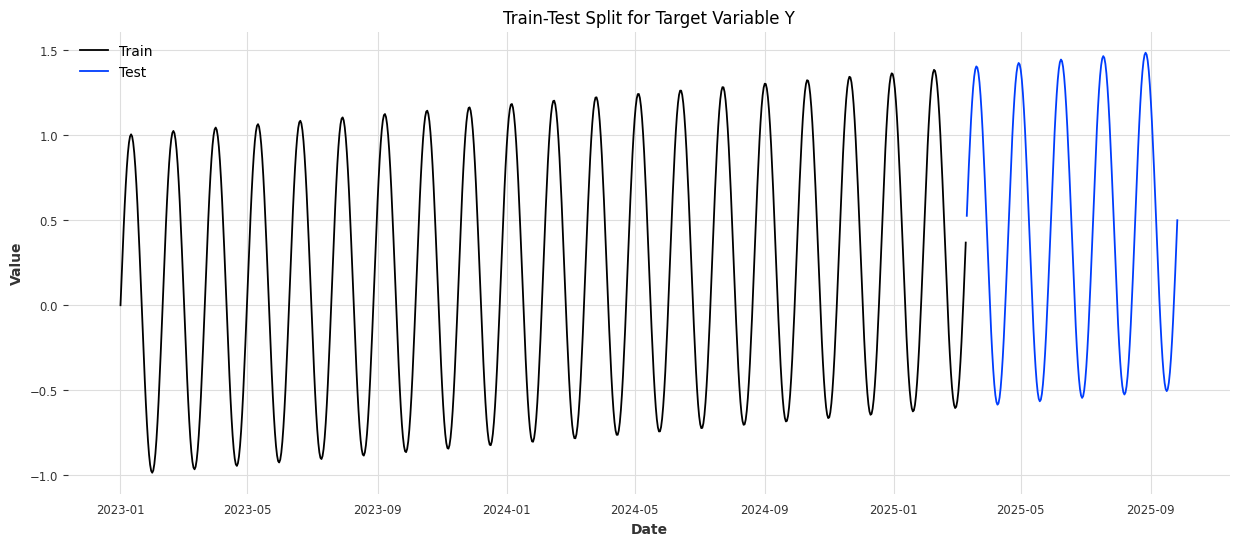

In [24]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

np.random.seed(42)
default_float = np.float32

# Generate synthetic data
n_samples = 1000
dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')

# Create independent variables
X1 = np.sin(np.linspace(0, 50*np.pi, n_samples)).astype(default_float)  # Seasonal pattern (10 full cycles)
X2 = np.linspace(0, 1, n_samples).astype(default_float)  # Very slow linear trend
X3 = np.ones(n_samples).astype(default_float)  # Constant (no influence)

# Generate target variable Y with simple dependencies on X
Y = (
    1.0 * X1 +  # Seasonal component
    0.5 * X2 +  # Trend component
    0.0 * X3    # No influence
).astype(default_float)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': dates,
    'Y': Y,
    'X1': X1,
    'X2': X2,
    'X3': X3
})

# Convert to TimeSeries objects
target = TimeSeries.from_dataframe(df, 'timestamp', 'Y')
covariates = TimeSeries.from_dataframe(df, 'timestamp', ['X1', 'X2', 'X3'])

# Split into train and test sets
train_test_split = int(0.8 * len(target))
train_target, test_target = target[:train_test_split], target[train_test_split:]
train_covariates, test_covariates = covariates[:train_test_split], covariates[train_test_split:]

print("True relationships:")
print("Y = 1.0 * X1 + 0.5 * X2 + 0.0 * X3")

# Plotting
plt.figure(figsize=(15, 10))

# Plot each input variable
for i, col in enumerate(['X1', 'X2', 'X3']):
    plt.subplot(2, 2, i+1)
    plt.plot(dates, df[col])
    plt.title(f'Variable {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

# Plot the target variable
plt.subplot(2, 2, 4)
plt.plot(dates, df['Y'])
plt.title('Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot all variables together
plt.figure(figsize=(15, 8))
for col in ['X1', 'X2', 'X3', 'Y']:
    plt.plot(dates, df[col], label=col)
plt.title('All Variables')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot train and test split for Y
plt.figure(figsize=(15, 6))
plt.plot(dates[:train_test_split], df['Y'][:train_test_split], label='Train')
plt.plot(dates[train_test_split:], df['Y'][train_test_split:], label='Test')
plt.title('Train-Test Split for Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
num_samples=100)

In [37]:
# Get the real loss
predictions = model.predict(n=len(test_target), series=train_target, past_covariates=covariates,num_samples=100)
realloss = mse(test_target, predictions)

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:54<00:00,  0.02it/s]


In [47]:
test_target[1]

<TimeSeries (DataArray) (timestamp: 1, component: 1, sample: 1)> Size: 4B
array([[[0.4283634]]], dtype=float32)
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 8B 2044-11-27
  * component  (component) object 8B 'Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [45]:
predictions[230]

<TimeSeries (DataArray) (timestamp: 1, component: 1, sample: 100)> Size: 400B
array([[[-0.84433985, -0.8704976 , -0.84988713, -0.86678565,
         -0.8267913 , -0.8525739 , -0.6881412 , -0.81588876,
         -0.87756073, -0.8465708 , -0.86759347, -0.69436544,
         -0.8614506 , -0.8404552 , -0.8969287 , -0.8511037 ,
         -0.8783099 , -0.8390928 , -0.83458954, -0.84631777,
         -0.8326106 , -0.8360457 , -0.84584534, -0.8601352 ,
         -0.89070034, -0.87136644, -0.8498625 , -0.8280696 ,
         -0.86537445, -0.82211155, -0.8547701 , -0.85916585,
         -0.8288071 , -0.86837584, -0.8575826 , -0.8364258 ,
         -0.8649024 , -0.85064876, -0.85533845, -0.8169692 ,
         -0.7185905 , -0.8591753 , -0.9012076 , -0.8494279 ,
         -0.83387655, -0.86370486, -0.83792937, -0.8606717 ,
         -0.747981  , -0.8482931 , -0.7699835 , -0.9022389 ,
         -0.8291105 , -0.8271755 , -0.81534183, -0.89788085,
         -0.8354091 , -0.84331393, -0.84657735, -0.87039846,
         -0.82985675, -0.88999385, -0.82149494, -0.8600519 ,
         -0.85590833, -0.8407263 , -0.78351176, -0.86322135,
         -0.85824734, -0.84758043, -0.7418948 , -0.85302097,
         -0.84862685, -0.84440994, -0.8362035 , -0.8865749 ,
         -0.82801443, -0.8399857 , -0.8488697 , -0.8713409 ,
         -0.84141123, -0.84170866, -0.84361756, -0.8138604 ,
         -0.8175211 , -0.84375936, -0.81675375, -0.81567717,
         -0.86908334, -0.8961227 , -0.83376235, -0.8116496 ,
         -0.829344  , -0.8840236 , -0.8005504 , -0.8670606 ,
         -0.76113737, -0.81983596, -0.75821096, -0.75995445]]],
      dtype=float32)
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 8B 2045-07-14
  * component  (component) object 8B 'Y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

True relationships:
Y = 1.0 * X1 + 0.5 * X2 + 0.0 * X3


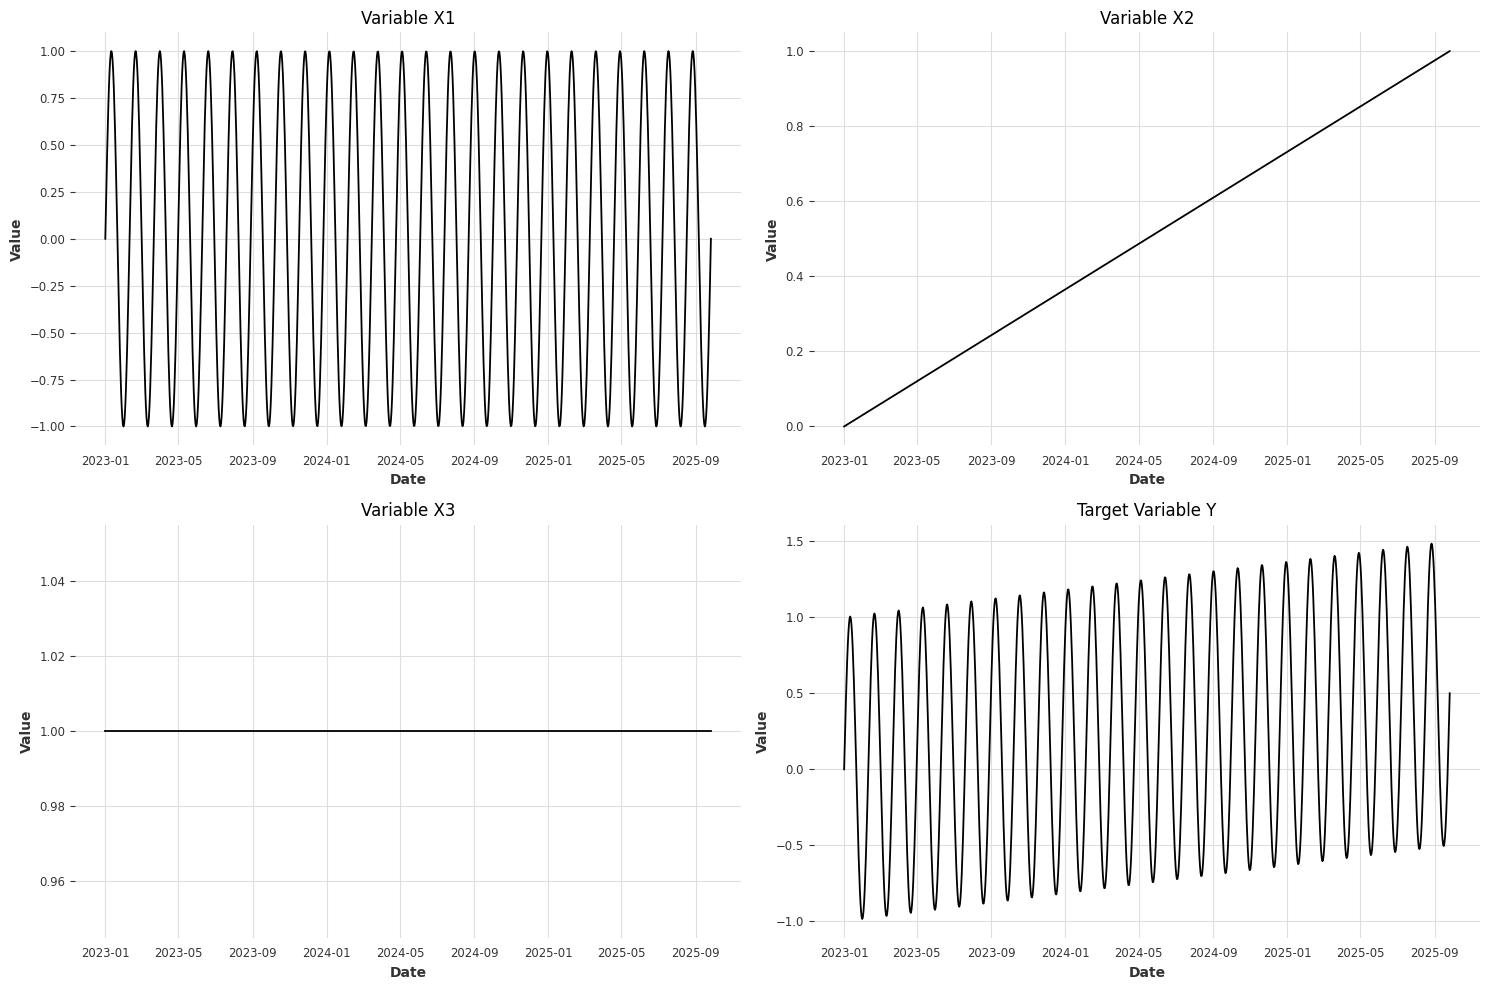

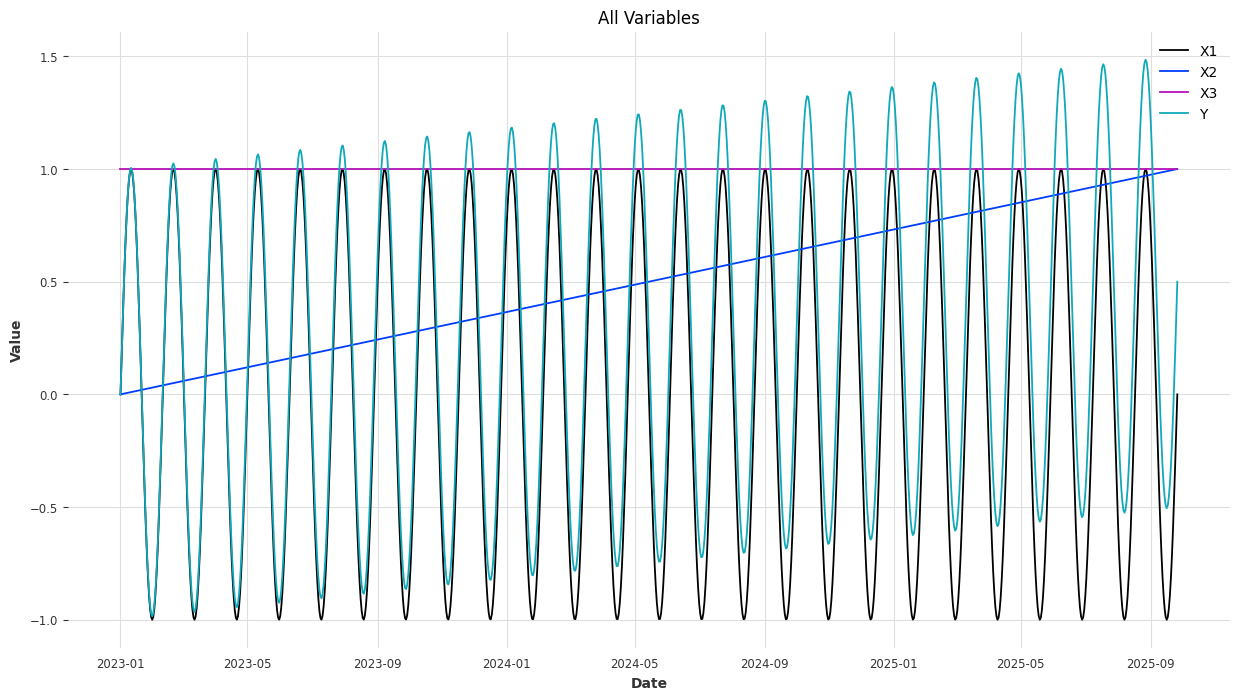

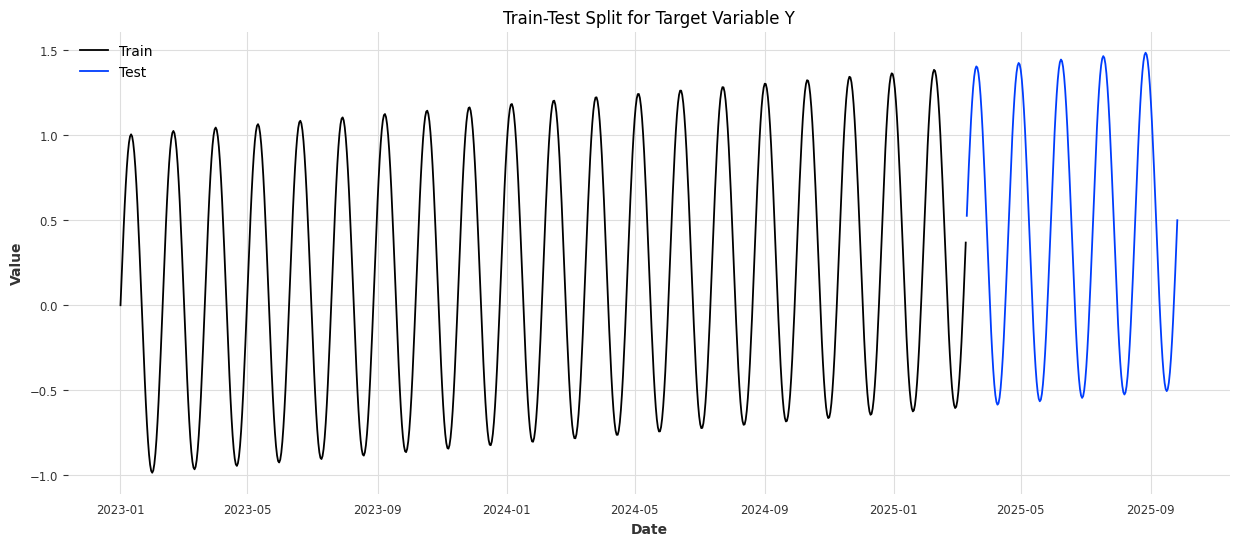

In [50]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

np.random.seed(42)
default_float = np.float32

# Generate synthetic data
n_samples = 1000
dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')

# Create independent variables
X1 = np.sin(np.linspace(0, 50*np.pi, n_samples)).astype(default_float)  # Seasonal pattern (50 full cycles)
X2 = np.linspace(0, 1, n_samples).astype(default_float)  # Very slow linear trend
X3 = np.ones(n_samples).astype(default_float)  # Constant (no influence)

# Generate target variable Y with simple dependencies on X
Y = (
    1.0 * X1 +  # Seasonal component
    0.5 * X2 +  # Trend component
    0.0 * X3    # No influence
).astype(default_float)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': dates,
    'Y': Y,
    'X1': X1,
    'X2': X2,
    'X3': X3
})

# Convert to TimeSeries objects
target = TimeSeries.from_dataframe(df, 'timestamp', 'Y')
covariates = TimeSeries.from_dataframe(df, 'timestamp', ['X1', 'X2', 'X3'])

# Split into train and test sets
train_test_split = int(0.8 * len(target))
train_target, test_target = target[:train_test_split], target[train_test_split:]
train_covariates, test_covariates = covariates[:train_test_split], covariates[train_test_split:]

print("True relationships:")
print("Y = 1.0 * X1 + 0.5 * X2 + 0.0 * X3")

# Plotting
plt.figure(figsize=(15, 10))

# Plot each input variable
for i, col in enumerate(['X1', 'X2', 'X3']):
    plt.subplot(2, 2, i+1)
    plt.plot(dates, df[col])
    plt.title(f'Variable {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

# Plot the target variable
plt.subplot(2, 2, 4)
plt.plot(dates, df['Y'])
plt.title('Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot all variables together
plt.figure(figsize=(15, 8))
for col in ['X1', 'X2', 'X3', 'Y']:
    plt.plot(dates, df[col], label=col)
plt.title('All Variables')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot train and test split for Y
plt.figure(figsize=(15, 6))
plt.plot(dates[:train_test_split], df['Y'][:train_test_split], label='Train')
plt.plot(dates[train_test_split:], df['Y'][train_test_split:], label='Test')
plt.title('Train-Test Split for Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

True relationships:
Y = 1.0 * X1 + 1.2 * X2 + 0.0 * X3


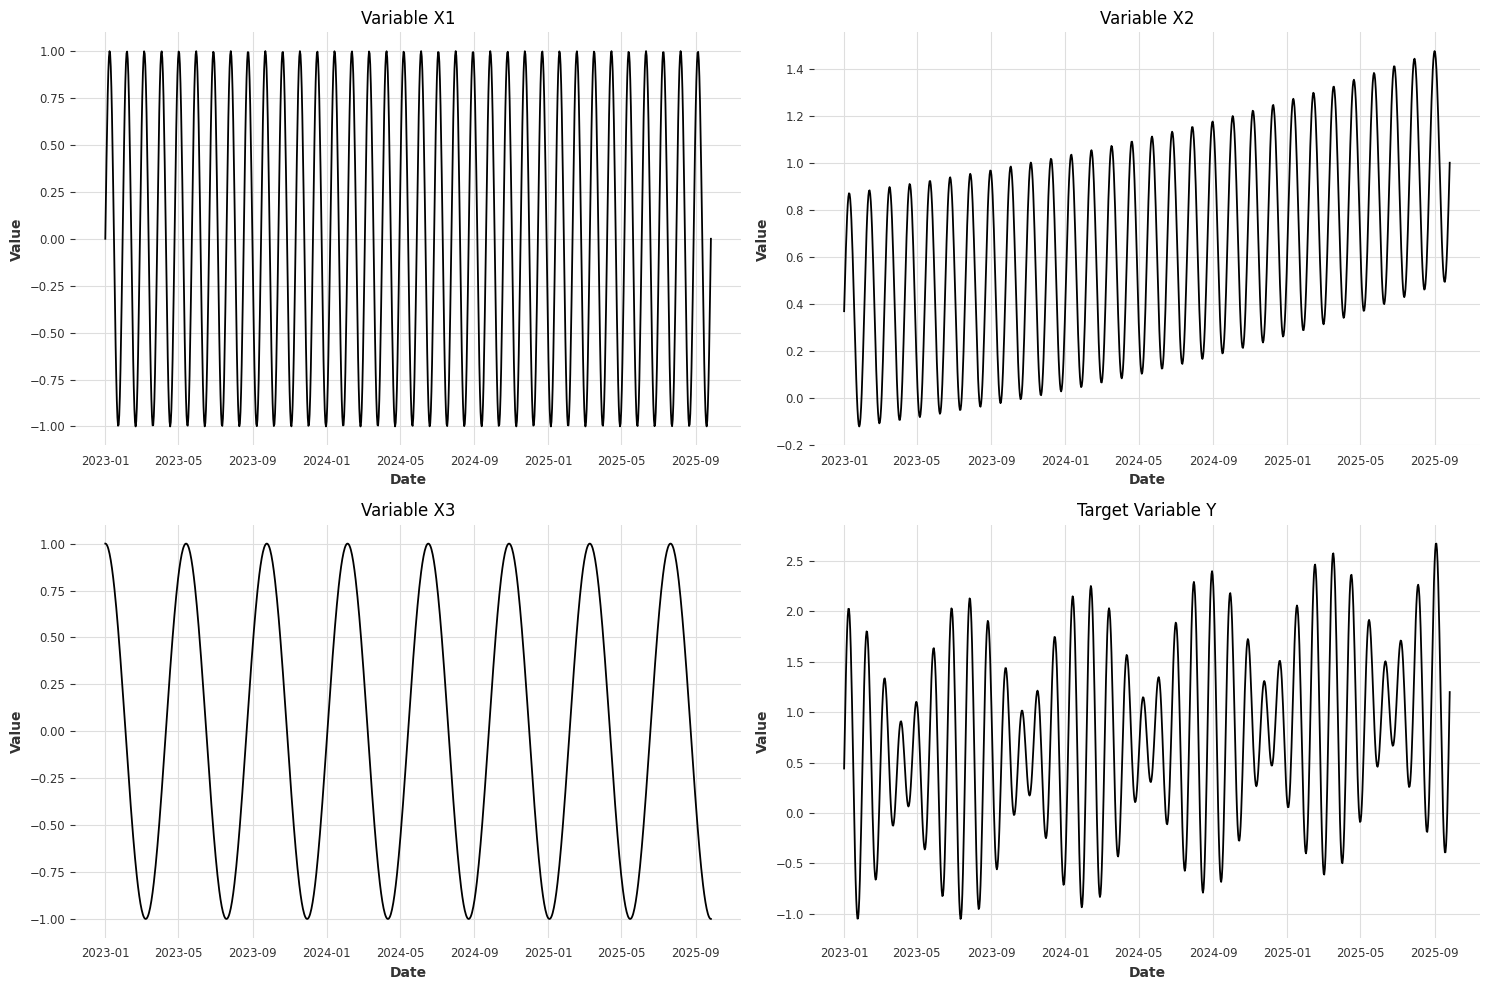

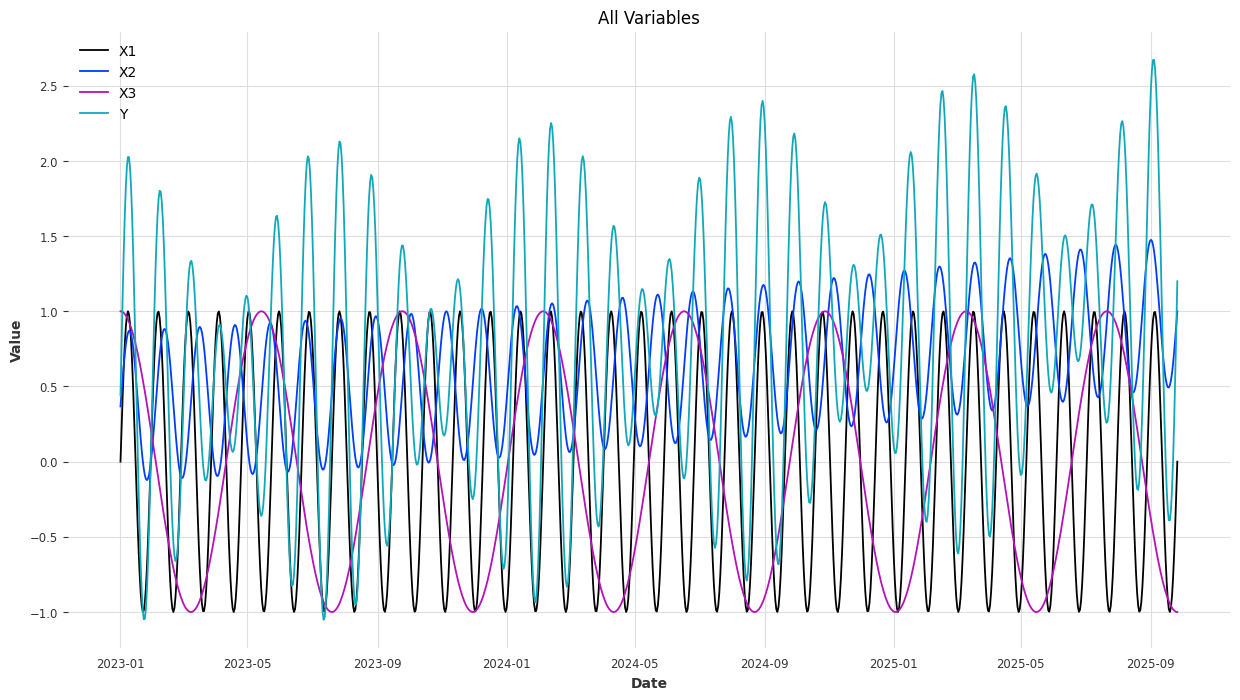

In [13]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

np.random.seed(42)
default_float = np.float32

# Generate synthetic data
n_samples = 1000
dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')

# Create independent variables
X1 = np.sin(np.linspace(0, 70*np.pi, n_samples)).astype(default_float)  # Seasonal pattern (50 full cycles)

# Complex trend for X2
t = np.linspace(0, 1, n_samples)
X2 = (
    np.exp(t) / np.exp(1) +  # trend
    0.5 * np.sin(np.linspace(0, 60*np.pi, n_samples))   # Slow cyclical component
    #0.8 * (t > 0.5)  # Step increase halfway through
    #0.1 * np.random.randn(n_samples)  # Small random fluctuations
).astype(default_float)

X3 = np.cos(np.linspace(0, 15*np.pi, n_samples)).astype(default_float) #np.ones(n_samples).astype(default_float)  # Constant (no influence)

# Generate target variable Y with dependencies on X
Y = (
    1.0 * X1 +  # Seasonal component
    1.2 * X2 +  # Complex trend component
    0.0 * X3    # No influence
).astype(default_float)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': dates,
    'Y': Y,
    'X1': X1,
    'X2': X2,
    'X3': X3
})

# Convert to TimeSeries objects
target = TimeSeries.from_dataframe(df, 'timestamp', 'Y')
covariates = TimeSeries.from_dataframe(df, 'timestamp', ['X1', 'X2', 'X3'])

# Split into train and test sets
train_test_split = int(0.7 * len(target))
train_target, test_target = target[:train_test_split], target[train_test_split:]
train_covariates, test_covariates = covariates[:train_test_split], covariates[train_test_split:]

print("True relationships:")
print("Y = 1.0 * X1 + 1.2 * X2 + 0.0 * X3")

# Plotting
plt.figure(figsize=(15, 10))

# Plot each input variable
for i, col in enumerate(['X1', 'X2', 'X3']):
    plt.subplot(2, 2, i+1)
    plt.plot(dates, df[col])
    plt.title(f'Variable {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

# Plot the target variable
plt.subplot(2, 2, 4)
plt.plot(dates, df['Y'])
plt.title('Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot all variables together
plt.figure(figsize=(15, 8))
for col in ['X1', 'X2', 'X3', 'Y']:
    plt.plot(dates, df[col], label=col)
plt.title('All Variables')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

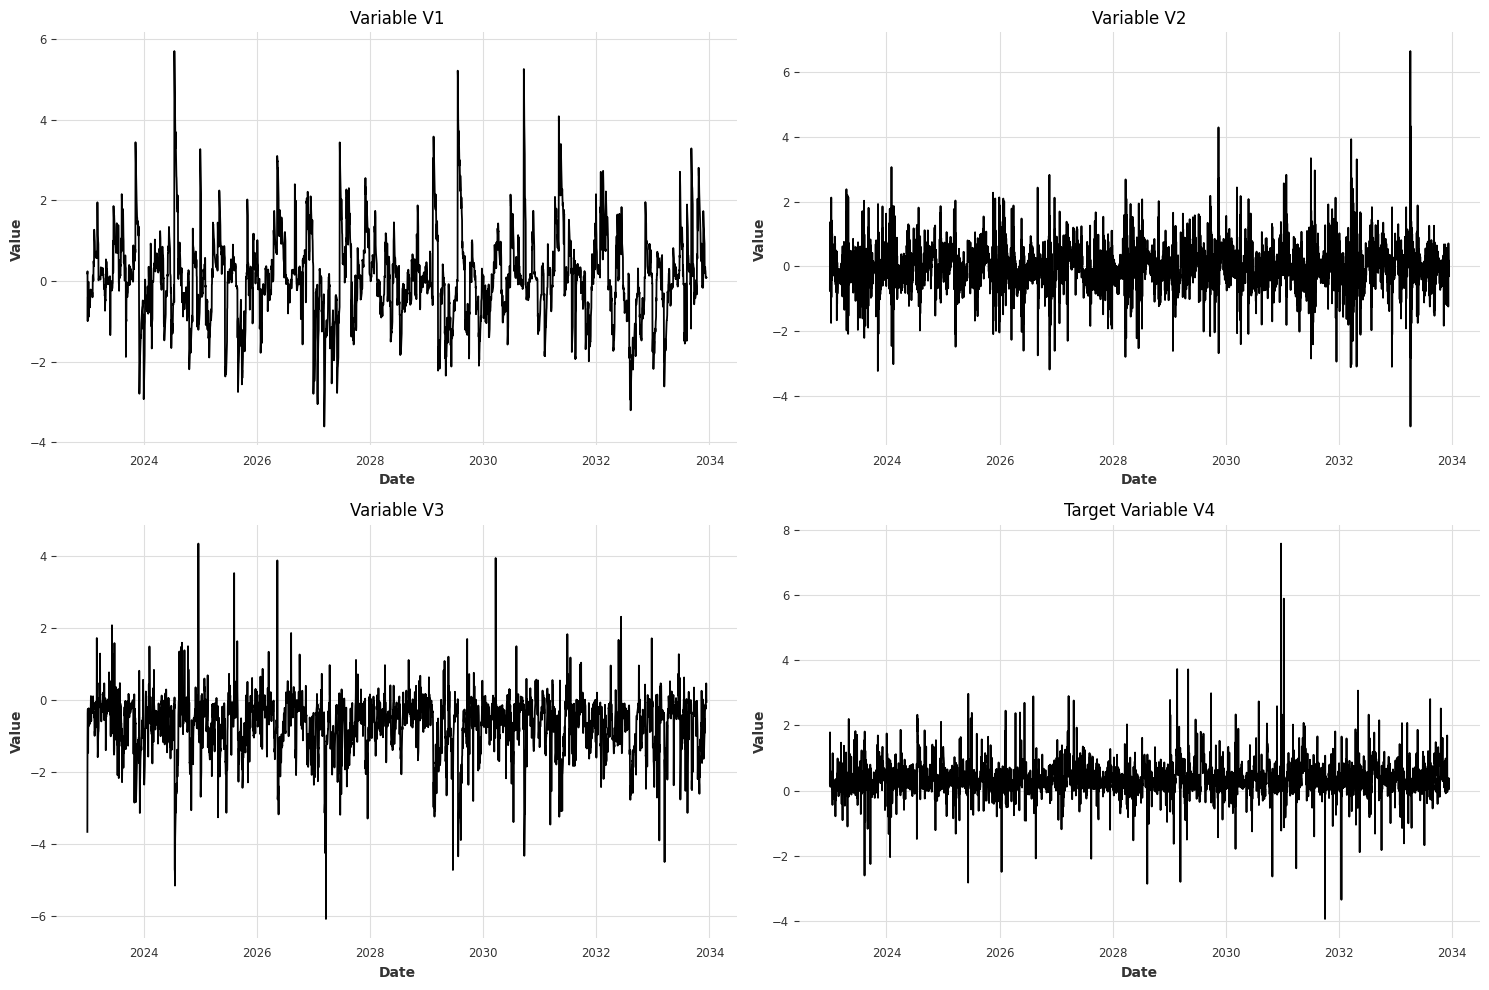

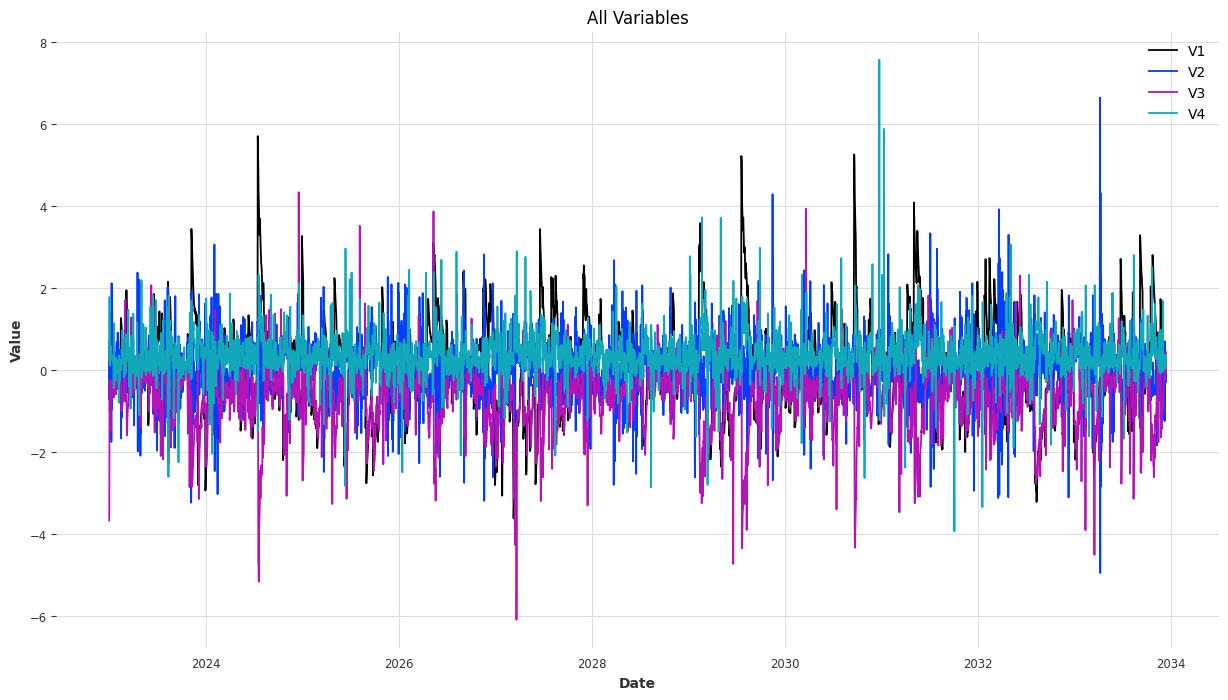

Data loaded and prepared for modeling.
Training set size: 3600
Test set size: 400


In [85]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv('data_0.csv')  # Replace with your actual file name

# Convert the time_index to datetime
df['timestamp'] = pd.to_datetime(df['time_index'], unit='D', origin='2023-01-01')

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Drop the original time_index column if it's still present
df = df.drop('time_index', axis=1, errors='ignore')

# Convert to TimeSeries objects
target_variable = "V4"
covariates = ['V1', 'V2', 'V3']
target = TimeSeries.from_series(df[target_variable].astype(default_float))  # Using from_series for a single column
covariates = TimeSeries.from_dataframe(df[covariates].astype(default_float))

# Split into train and test sets
train_test_split = int(0.9 * len(target))
train_target, test_target = target[:train_test_split], target[train_test_split:]
train_covariates, test_covariates = covariates[:train_test_split], covariates[train_test_split:]

# Plotting
plt.figure(figsize=(15, 10))

# Plot each input variable
for i, col in enumerate(['V1', 'V2', 'V3']):
    plt.subplot(2, 2, i+1)
    plt.plot(df.index, df[col])
    plt.title(f'Variable {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

# Plot the target variable
plt.subplot(2, 2, 4)
plt.plot(df.index, df['V4'])
plt.title('Target Variable V4')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot all variables together
plt.figure(figsize=(15, 8))
for col in ['V1', 'V2', 'V3', 'V4']:
    plt.plot(df.index, df[col], label=col)
plt.title('All Variables')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Data loaded and prepared for modeling.")
print(f"Training set size: {len(train_target)}")
print(f"Test set size: {len(test_target)}")

DATA WITH DELAYSS:

True relationships:
Y = 1.0 * X1_delayed (5-day delay) + 1.2 * X2_delayed (10-day delay) + 0.0 * X3


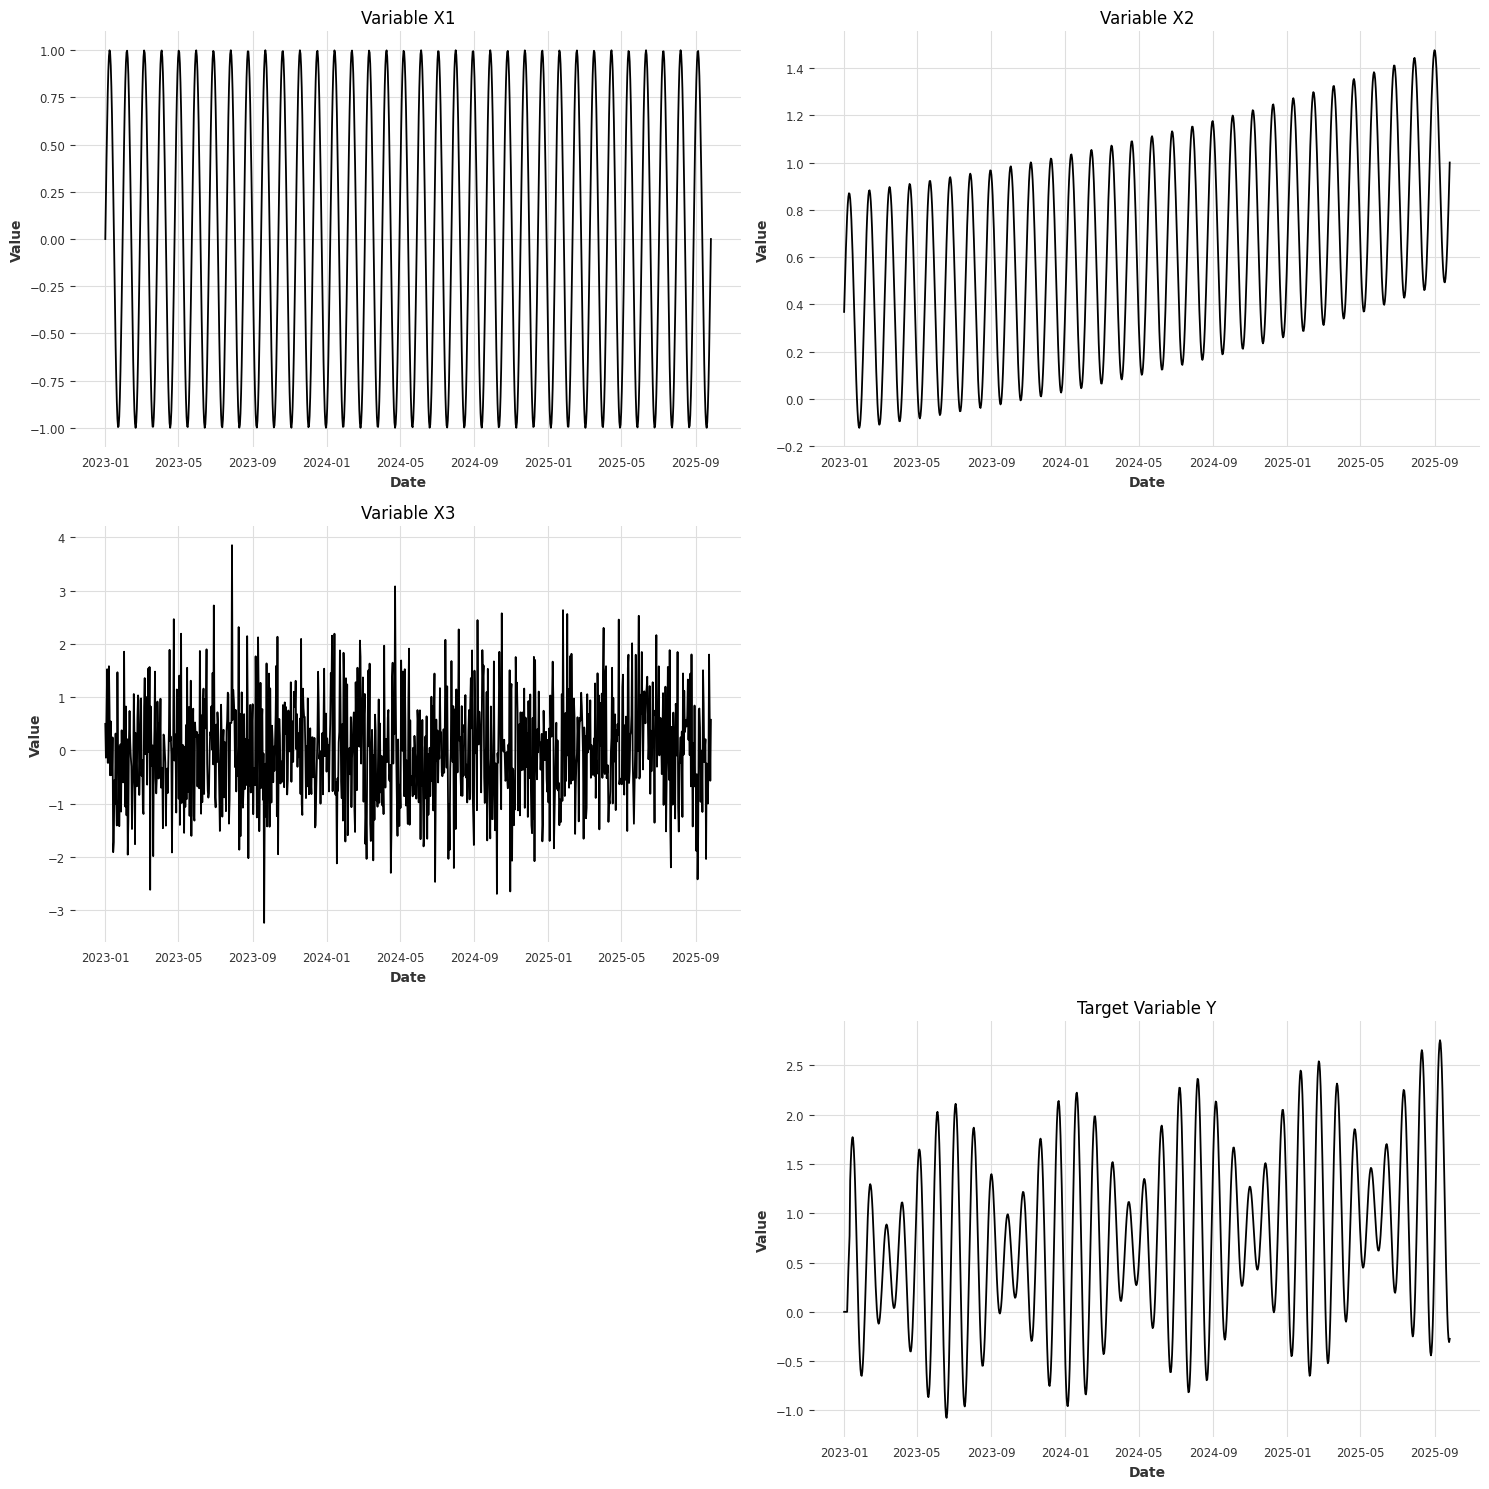

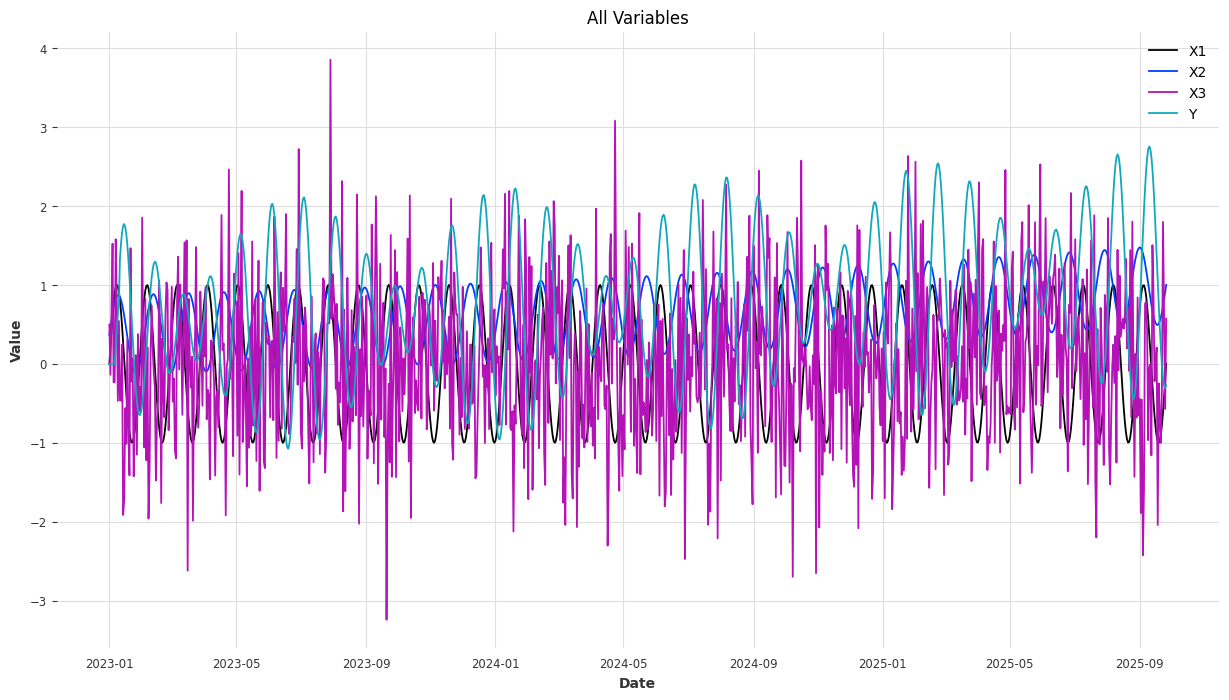

In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

np.random.seed(42)
default_float = np.float32

# Generate synthetic data
n_samples = 1000
dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')

# Create independent variables
X1 = np.sin(np.linspace(0, 70*np.pi, n_samples)).astype(default_float) # Seasonal pattern (50 full cycles)

# Complex trend for X2
t = np.linspace(0, 1, n_samples)
X2 = (
    np.exp(t) / np.exp(1) + # Exponential trend
    0.5 * np.sin(np.linspace(0, 60*np.pi, n_samples)) # Slow cyclical component
).astype(default_float)

X3 = np.random.normal(0, 1, n_samples).astype(default_float)

# Introduce delays
X1_delayed = np.roll(X1, 5)  # 5-day delay for X1
X1_delayed[:5] = 0  # Set first 5 values to 0

X2_delayed = np.roll(X2, 10)  # 10-day delay for X2
X2_delayed[:10] = 0  # Set first 10 values to 0

# Generate target variable Y with dependencies on delayed X
Y = (
    1.0 * X1_delayed + # Seasonal component with delay
    1.2 * X2_delayed + # Complex trend component with delay
    0.0 * X3 # No influence
).astype(default_float)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': dates,
    'Y': Y,
    'X1': X1,
    'X2': X2,
    'X3': X3,
})

# Convert to TimeSeries objects
target = TimeSeries.from_dataframe(df, 'timestamp', 'Y')
covariates = TimeSeries.from_dataframe(df, 'timestamp', ['X1', 'X2', 'X3'])

# Split into train and test sets
train_test_split = int(0.7 * len(target))
train_target, test_target = target[:train_test_split], target[train_test_split:]
train_covariates, test_covariates = covariates[:train_test_split], covariates[train_test_split:]

print("True relationships:")
print("Y = 1.0 * X1_delayed (5-day delay) + 1.2 * X2_delayed (10-day delay) + 0.0 * X3")

# Plotting
plt.figure(figsize=(15, 15))

# Plot each input variable
for i, col in enumerate(['X1', 'X2', 'X3']):
    plt.subplot(3, 2, i+1)
    plt.plot(dates, df[col])
    plt.title(f'Variable {col}')
    plt.xlabel('Date')
    plt.ylabel('Value')

# Plot the target variable
plt.subplot(3, 2, 6)
plt.plot(dates, df['Y'])
plt.title('Target Variable Y')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot all variables together
plt.figure(figsize=(15, 8))
for col in ['X1', 'X2', 'X3', 'Y']:
    plt.plot(dates, df[col], label=col)
plt.title('All Variables')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1` reached.
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:07<00:00,  0.14it/s]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 7.1 K  | train
5  | decoder_vsn                       | _VariableSelectionNetwork        | 896    | train
6  | static_context_grn                | _GatedResidualNetwork            | 4.3 K  | train
7  | static_context_hidden_encoder_grn | _GatedResidualNetw

Epoch 29: 100%|██████████| 43/43 [00:04<00:00,  8.70it/s, train_loss=86.90]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 43/43 [00:04<00:00,  8.70it/s, train_loss=86.90]


`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:02<00:00,  0.37it/s]


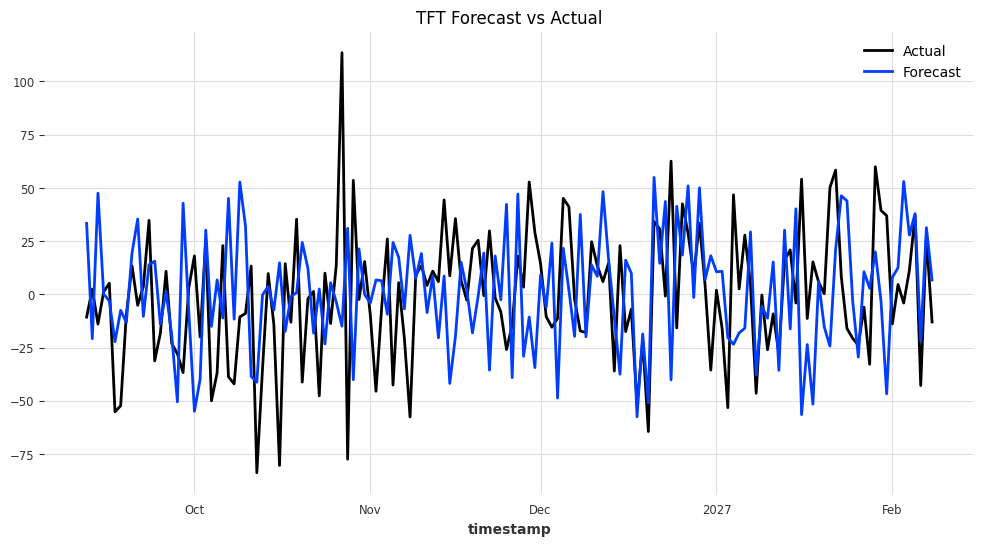

First loss: 944.0625
Real loss: 1688.4774169921875


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from darts import TimeSeries
from darts.models import TFTModel
from darts.metrics import mse
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime, os


# Train the model and get the first loss and real loss
model = TFTModel(
    model_name="tft_test2",
    input_chunk_length=2,
    output_chunk_length=2,
    hidden_size=32,
    lstm_layers=1,
    num_attention_heads=2,
    batch_size=32,
    n_epochs=30,
    add_relative_index=True,
    
    #add_encoders ={ "cyclic": {"future": ["dayofweek", "month"]} },
   #log_tensorboard=True,
)


# Get the first loss (after one epoch)
model_first_epoch = TFTModel(
    input_chunk_length=2,
    output_chunk_length=2,
    hidden_size=128,
    lstm_layers=1,
    num_attention_heads=2,
    batch_size=32,
    n_epochs=1,
    add_relative_index=True,
    #add_encoders={ "cyclic": {"future": ["dayofweek", "month"]} },
)
model_first_epoch.fit(train_target, past_covariates=train_covariates, verbose=False)
first_predictions = model_first_epoch.predict(n=len(test_target), series=train_target, past_covariates=covariates)
firstloss = mse(test_target, first_predictions)

# Train the full model
model.fit(train_target, past_covariates=train_covariates, verbose=True)

# Get the real loss
predictions = model.predict(n=len(test_target), series=train_target, past_covariates=covariates)
realloss = mse(test_target, predictions)
# Plot results
plt.figure(figsize=(12, 6))
test_target.plot(label="Actual")
predictions.plot(label="Forecast")
plt.title("TFT Forecast vs Actual")
plt.legend()
plt.show()

print(f"First loss: {firstloss}")
print(f"Real loss: {realloss}")



In [ ]:
First loss: 1.111034631729126
Real loss: 0.2012811303138733

In [86]:
from darts.explainability import TFTExplainer
explainer = TFTExplainer(model)

explainability_result = explainer.explain()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
from darts import TimeSeries
from darts.models import TFTModel
from darts.metrics import mse
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime, os


# Train the model and get the first loss and real loss
model = TFTModel(
    model_name="FINAL_tft_targetv4_simple",
    input_chunk_length=30,
    output_chunk_length=14,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=2,
    #output_chunk_shift = 15,
    batch_size=32,
    n_epochs=50,
    add_relative_index=True,
    #add_encoders={ "cyclic": {"future": ["dayofweek", "month"]} },
    log_tensorboard=True,
)


# Get the first loss (after one epoch)
model_first_epoch = TFTModel(
    input_chunk_length=30,
    output_chunk_length=14,
    hidden_size=64,
    lstm_layers=2,
    num_attention_heads=4,
    #output_chunk_shift = 15,
    batch_size=32,
    n_epochs=1,
    add_relative_index=True,
    add_encoders={ "cyclic": {"future": ["dayofweek", "month"]} },

)
model_first_epoch.fit(train_target, past_covariates=train_covariates, verbose=False)
first_predictions = model_first_epoch.predict(n=len(test_target), series=train_target, past_covariates=covariates)
firstloss = mse(test_target, first_predictions)

# Train the full model
model.fit(train_target, past_covariates=train_covariates, verbose=True)

# Get the real loss
predictions = model.predict(n=len(test_target), series=train_target, past_covariates=covariates)
realloss = mse(test_target, predictions)
# Plot results
plt.figure(figsize=(12, 6))
test_target.plot(label="Actual")
predictions.plot(label="Forecast")
plt.title("TFT Forecast vs Actual")
plt.legend()
plt.show()

print(f"First loss: {firstloss}")
print(f"Real loss: {realloss}")



GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/florisschouw/.pyenv/versions/3.10.14/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  0.67it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 8.8 K  | train
5  | decoder_vsn                       | _VariableSelectionNetwork        | 1.6 K  | train
6  | static_context_grn                | _GatedResidualNetwork            | 16.8 K | train
7  | static_context_hidden_encoder_grn | _GatedResidualNetw


Epoch 0:  75%|███████▌  | 84/112 [00:09<00:03,  8.56it/s, v_num=logs, train_loss=1.890]

In [ ]:
for target_variable in ['var1', 'var2', 'var3', 'var4']:
    # Run your PFI analysis here
    
    # Save the results
    target_results = {
        'target': target_variable,
        'realloss': realloss,
        'pfi_ratios': {var: pfi_ratio for var, pfi_ratio in zip(variables, pfi_ratios)}
    }
    results.append(target_results)


In [34]:
import numpy as np
import tensorflow as tf
import random

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Real loss: 1.529556155204773
Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.31it/s]

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



V1: Shuffled_loss = 1.5618924658952051
V1: PFI ratio = 0.9792967112675721
Removed V1 as it didn't significantly impact the predictions.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:03<00:00,  0.29it/s]

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



V2: Shuffled_loss = 1.0928862846127854
V2: PFI ratio = 1.3995565474103298
Removed V2 as it didn't significantly impact the predictions.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:02<00:00,  0.38it/s]
V3: Shuffled_loss = 1.1688954118182808
V3: PFI ratio = 1.3085483437953311
Removed V3 as it didn't significantly impact the predictions.
Validated covariates: []
PFI Results: {'V1': 0.9792967112675721, 'V2': 1.3995565474103298, 'V3': 1.3085483437953311}


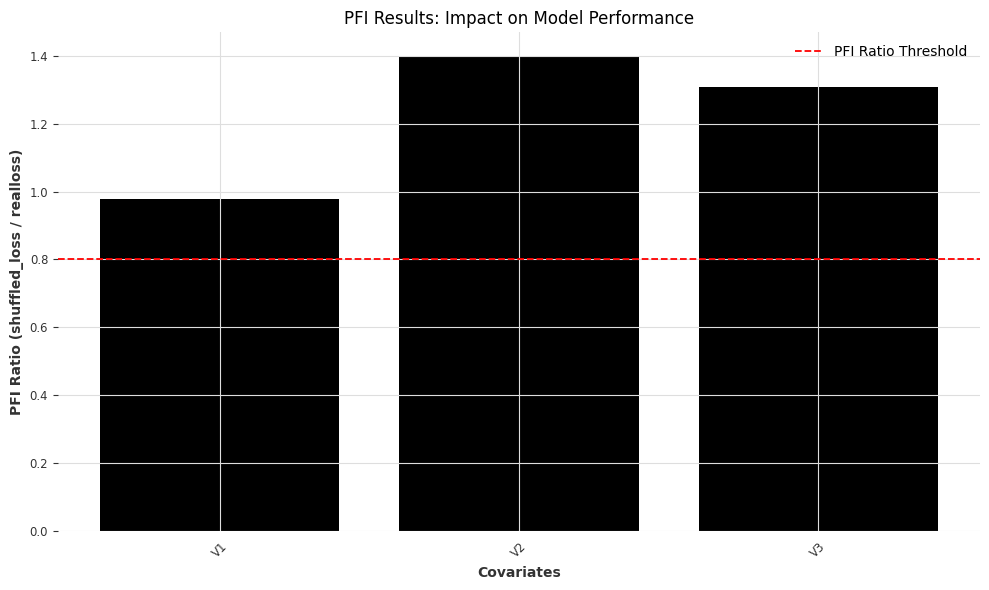

In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf
from darts import TimeSeries
from darts.models import TFTModel
from darts.metrics import mse
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime, os

# ... [Previous code for data generation remains the same] ...

# Function to shuffle a specific column in the covariates
def shuffle_covariate(covariates, column_name):
    shuffled_covariates = covariates.copy()
    values = shuffled_covariates.values()
    column_index = list(covariates.columns).index(column_name)
    np.random.shuffle(values[:, column_index])
    shuffled_df = pd.DataFrame(
        values,
        columns=covariates.columns,
        index=covariates.time_index
    )
    return TimeSeries.from_dataframe(shuffled_df)

# Calculate the real loss
predictions = model.predict(n=len(test_target), series=train_target, past_covariates=covariates)
realloss = mse(test_target, predictions)
print(f"Real loss: {realloss}")

# PFI
threshold = 0.8  # You can adjust this value
validated_covariates = list(covariates.columns)
pfi_results = {}

for column in covariates.columns:
    # Shuffle the current covariate
    shuffled_covariates = shuffle_covariate(covariates, column)
    num_samples=100
    # Make predictions using the shuffled covariate
    shuffled_predictions = model.predict(n=len(test_target), series=train_target, past_covariates=shuffled_covariates, num_samples=num_samples)
    predictions = shuffled_predictions.quantile_timeseries(0.1)
    # Calculate the loss with shuffled covariate
    shuffled_loss = mse(test_target, predictions)
    
    # Calculate the PFI ratio
    pfi_ratio = realloss / shuffled_loss 
    print(f"{column}: Shuffled_loss = {shuffled_loss}")
    print(f"{column}: PFI ratio = {pfi_ratio}")
    
    # Check if the variable is causal
    if pfi_ratio <= threshold:
        print(f"{column} is validated as a causal variable.")
    else:
        validated_covariates.remove(column)
        print(f"Removed {column} as it didn't significantly impact the predictions.")
    
    pfi_results[column] = pfi_ratio

print("Validated covariates:", validated_covariates)
print("PFI Results:", pfi_results)

# Plot PFI results
plt.figure(figsize=(10, 6))
plt.bar(pfi_results.keys(), pfi_results.values())
plt.title("PFI Results: Impact on Model Performance")
plt.xlabel("Covariates")
plt.ylabel("PFI Ratio (shuffled_loss / realloss)")
plt.xticks(rotation=45)
plt.axhline(y=threshold, color='r', linestyle='--', label='PFI Ratio Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from darts import TimeSeries
from darts.models import TFTModel
from darts.metrics import mse
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime, os
# ... [Previous code for data generation remains the same] ...

# Function to shuffle a specific column in the covariates
def shuffle_covariate(covariates, column_name):
    shuffled_covariates = covariates.copy()
    values = shuffled_covariates.values()
    column_index = list(covariates.columns).index(column_name)
    np.random.shuffle(values[:, column_index])
    shuffled_df = pd.DataFrame(
        values,
        columns=covariates.columns,
        index=covariates.time_index
    )
    return TimeSeries.from_dataframe(shuffled_df)


realloss = mse(test_target, predictions)

print(f"First loss: {firstloss}")
print(f"Real loss: {realloss}")

# PIVM
significance = 0.8  # You can adjust this value
validated_covariates = list(covariates.columns)
pivm_results = {}
diff = firstloss - realloss
print("Diff:", diff)


for column in covariates.columns:
    # Shuffle the current covariate
    shuffled_covariates = shuffle_covariate(covariates, column)
    
    # Make predictions using the shuffled covariate
    num_samples = 100
    shuffled_predictions = model.predict(n=len(test_target), series=train_target, past_covariates=shuffled_covariates, num_samples=num_samples)
    median_predictions = shuffled_predictions.quantile_timeseries(0.2)
    testloss = mse(test_target, median_predictions)
    print(column, testloss)
    # Calculate the differences
    diff = firstloss - realloss #how much the model improved during training
    testdiff = firstloss - testloss #how much worse the model performs with the shuffled variable
    
    # Check if the variable is causal
    if testdiff > (diff * significance):
        #This means shuffling the variable didn't make the predictions much worse.
        #Therefore, this variable is probably not a true cause and is removed from the list of validated causes.
        validated_covariates.remove(column)
        print(f"Removed {column} as it didn't significantly impact the predictions.")
    else:
        #This means shuffling the variable significantly worsened the predictions.
        #Therefore, this variable is likely a true cause and remains in the list of validated causes.
        print(f"{column} is validated as a causal variable.")
    
    pivm_results[column] = (testdiff)

print("Validated covariates:", validated_covariates)
print("PIVM Results:", pivm_results)

# Plot PIVM results
plt.figure(figsize=(10, 6))
plt.bar(pivm_results.keys(), pivm_results.values())
plt.title("PIVM Results: Relative Impact on Model Performance")
plt.xlabel("Covariates")
plt.ylabel("testdiff = firstloss - testloss ")
plt.xticks(rotation=45)
plt.axhline(y=diff*significance, color='r', linestyle='--', label='diff Threshold')
plt.legend()
plt.tight_layout()
plt.show() 

ValueError: The model must be fit before calling predict(). For global models, if predict() is called without specifying a series, the model must have been fit on a single training series.


First loss: 0.5442545413970947
Real loss: 0.5670714378356934
Diff: -0.022816896


ValueError: The model must be fit before calling predict(). For global models, if predict() is called without specifying a series, the model must have been fit on a single training series.

In [54]:
from darts.explainability import TFTExplainer
explainer = TFTExplainer(model)

explainability_result = explainer.explain()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]


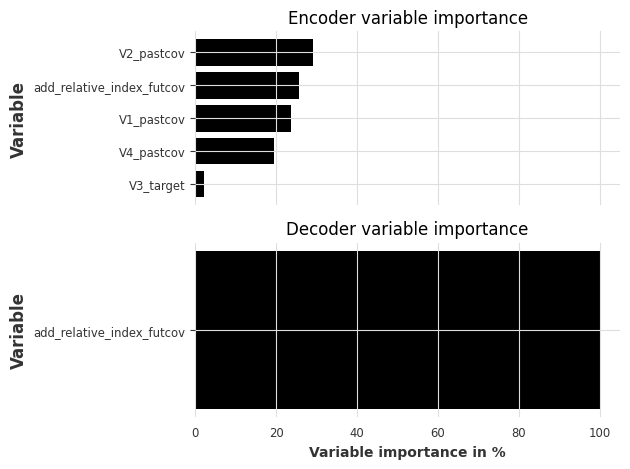

In [55]:
explainer.plot_variable_selection(explainability_result)



`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


First loss: 1.5617519617080688
Real loss: 0.030126886442303658
Diff: 1.531625
Predicting DataLoader 0: 100%|██████████| 1/1 [00:02<00:00,  0.42it/s]

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



X1 0.6247085486961658
X1 testdiff: 0.9370434130119031
X1 is validated as a causal variable.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  0.50it/s]

`predict()` was called with `n > output_chunk_length`: using auto-regression to forecast the values after `output_chunk_length` points. The model will access `(n - output_chunk_length)` future values of your `past_covariates` (relative to the first predicted time step). To hide this warning, set `show_warnings=False`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



X2 0.35822329102719813
X2 testdiff: 1.2035286706808708
X2 is validated as a causal variable.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  0.53it/s]
X3 0.11189209368037188
X3 testdiff: 1.449859868027697
Removed X3 as it didn't significantly impact the predictions.
Validated covariates: ['X1', 'X2']
PIVM Results: {'X1': 0.9370434130119031, 'X2': 1.2035286706808708, 'X3': 1.449859868027697}


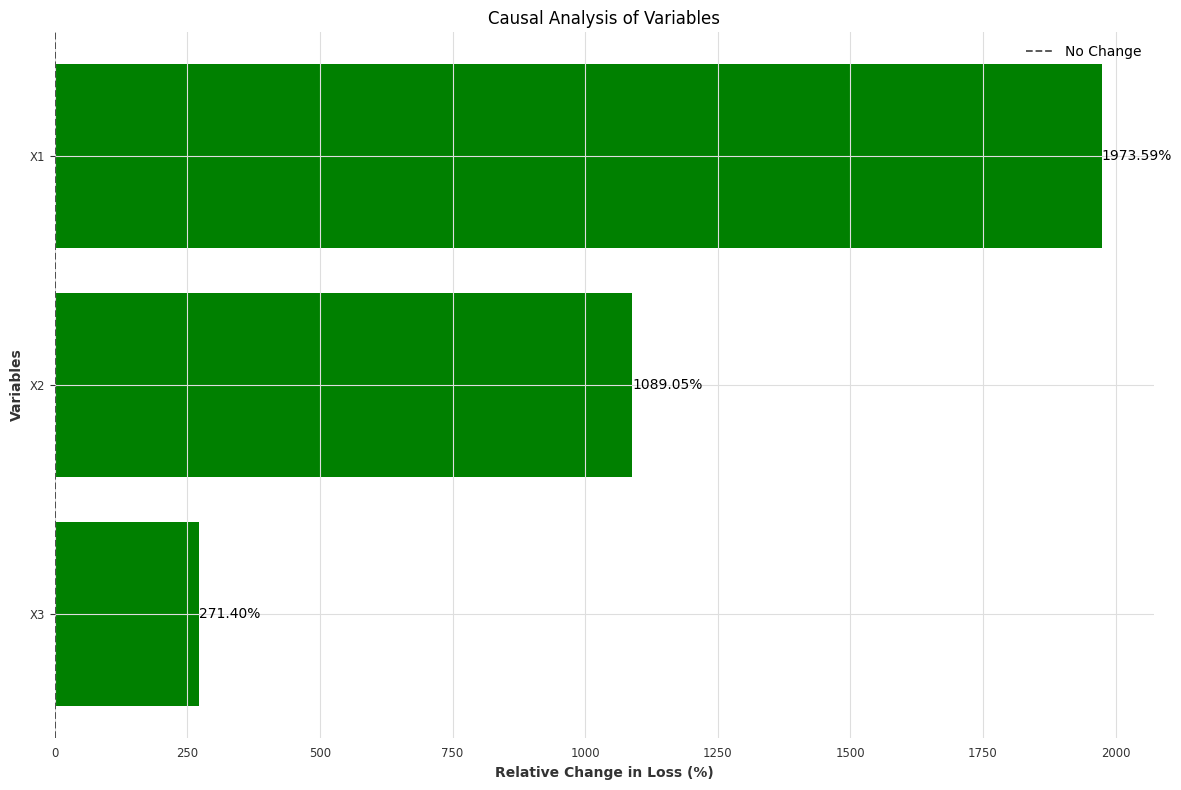


Detailed Results:
variable  testdiff  real_loss  shuffled_loss  relative_change
      X3  1.449860   0.030127       0.111892       271.402780
      X2  1.203529   0.030127       0.358223      1089.048499
      X1  0.937043   0.030127       0.624709      1973.591474

First loss: 1.5618
Real loss: 0.0301
Improvement: 98.07%


In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from darts import TimeSeries
from darts.models import TFTModel
from darts.metrics import mse
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime, os
# ... [Previous code for data generation remains the same] ...

# Function to shuffle a specific column in the covariates
def shuffle_covariate(covariates, column_name):
    shuffled_covariates = covariates.copy()
    values = shuffled_covariates.values()
    column_index = list(covariates.columns).index(column_name)
    np.random.shuffle(values[:, column_index])
    shuffled_df = pd.DataFrame(
        values,
        columns=covariates.columns,
        index=covariates.time_index
    )
    return TimeSeries.from_dataframe(shuffled_df)


realloss = mse(test_target, predictions)

print(f"First loss: {firstloss}")
print(f"Real loss: {realloss}")

# PIVM
significance = 0.8  # You can adjust this value
validated_covariates = list(covariates.columns)
pivm_results = {}
diff = firstloss - realloss
print("Diff:", diff)


for column in covariates.columns:
    # Shuffle the current covariate
    shuffled_covariates = shuffle_covariate(covariates, column)
    
    # Make predictions using the shuffled covariate
    num_samples = 100
    shuffled_predictions = model.predict(n=len(test_target), series=train_target, past_covariates=shuffled_covariates, num_samples=num_samples)
    median_predictions = shuffled_predictions.quantile_timeseries(0.01)
    testloss = mse(test_target, median_predictions)
    print(column, testloss)
    # Calculate the differences
    diff = firstloss - realloss #how much the model improved during training
    testdiff = firstloss - testloss #how much worse the model performs with the shuffled variable
    print(column, "testdiff:", testdiff)

    # Check if the variable is causal
    if testdiff > (diff * significance):
        #This means shuffling the variable didn't make the predictions much worse.
        #Therefore, this variable is probably not a true cause and is removed from the list of validated causes.
        validated_covariates.remove(column)
        print(f"Removed {column} as it didn't significantly impact the predictions.")
    else:
        #This means shuffling the variable significantly worsened the predictions.
        #Therefore, this variable is likely a true cause and remains in the list of validated causes.
        print(f"{column} is validated as a causal variable.")
    
    pivm_results[column] = (testdiff)

print("Validated covariates:", validated_covariates)
print("PIVM Results:", pivm_results)

import matplotlib.pyplot as plt
import numpy as np

def visualize_causal_analysis(pivm_results, firstloss, realloss, significance):
    df = pd.DataFrame(list(pivm_results.items()), columns=['variable', 'testdiff'])
    df['real_loss'] = realloss
    df['shuffled_loss'] = firstloss - df['testdiff']
    
    # Calculate relative change instead of absolute difference
    df['relative_change'] = (df['shuffled_loss'] - realloss) / realloss * 100
    
    # Sort by relative change
    df = df.sort_values('relative_change', ascending=True)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Use relative change for visualization
    bars = ax.barh(df['variable'], df['relative_change'], 
                   color=df['relative_change'].map(lambda x: 'green' if x > 0 else 'red'))

    ax.set_xlabel('Relative Change in Loss (%)')
    ax.set_ylabel('Variables')
    ax.set_title('Causal Analysis of Variables')

    # Add a vertical line at 0%
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.7, label='No Change')

    # Add text annotations
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}%', 
                ha='left' if width >= 0 else 'right', va='center')

    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nDetailed Results:")
    print(df.to_string(index=False))
    print(f"\nFirst loss: {firstloss:.4f}")
    print(f"Real loss: {realloss:.4f}")
    print(f"Improvement: {(firstloss - realloss) / firstloss * 100:.2f}%")

# Call the function with your data
visualize_causal_analysis(pivm_results, firstloss, realloss, significance)

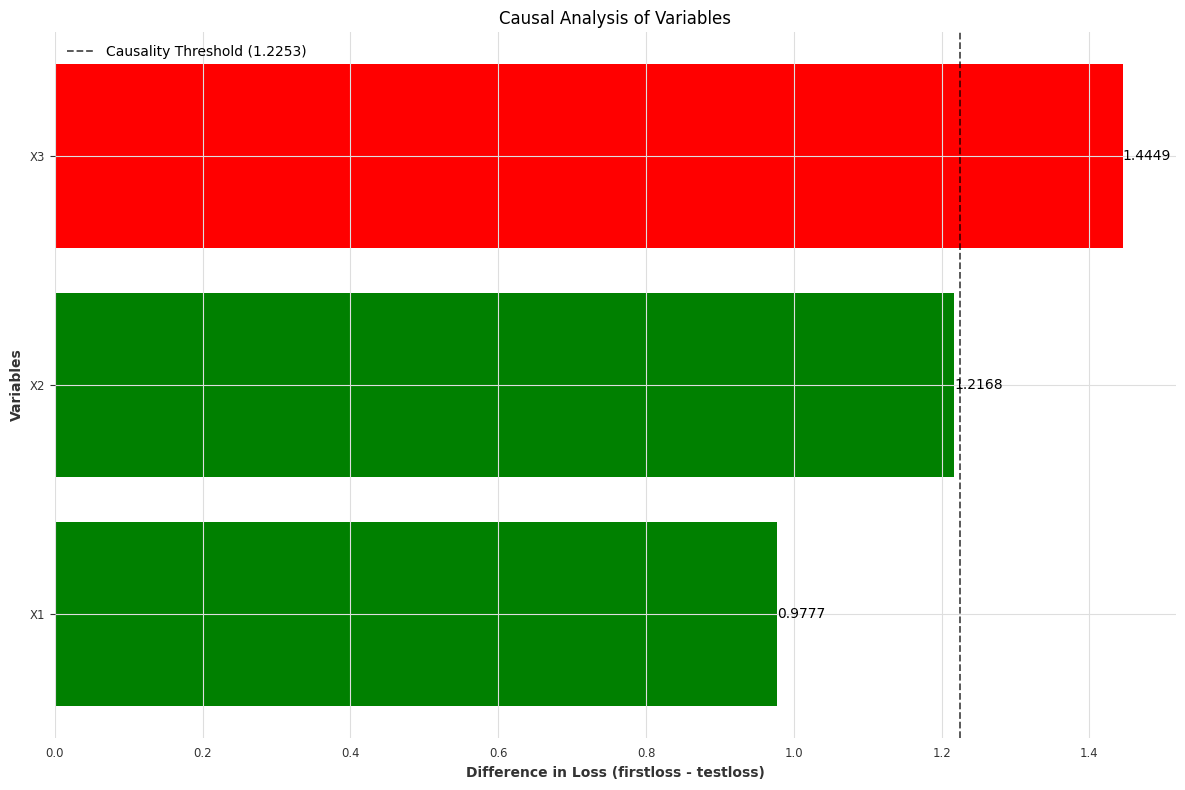


Detailed Results:
variable  testdiff  is_causal
      X1  0.977679       True
      X2  1.216765       True
      X3  1.444876      False

First loss: 1.5618
Real loss: 0.0301
Improvement: 1.5316
Causality threshold: 1.2253


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def visualize_causal_analysis(pivm_results, firstloss, realloss, significance):
    df = pd.DataFrame(list(pivm_results.items()), columns=['variable', 'testdiff'])
    
    # Calculate the improvement and threshold
    improvement = firstloss - realloss
    threshold = improvement * significance
    
    # Determine if variable is causal based on your PIVM logic
    df['is_causal'] = df['testdiff'] <= threshold
    
    # Sort by testdiff
    df = df.sort_values('testdiff', ascending=True)

    fig, ax = plt.subplots(figsize=(12, 8))

    bars = ax.barh(df['variable'], df['testdiff'], 
                   color=df['is_causal'].map({True: 'green', False: 'red'}))

    ax.set_xlabel('Difference in Loss (firstloss - testloss)')
    ax.set_ylabel('Variables')
    ax.set_title('Causal Analysis of Variables')

    # Add threshold line
    ax.axvline(x=threshold, color='black', linestyle='--', alpha=0.7, label=f'Causality Threshold ({threshold:.4f})')

    # Add text annotations
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.4f}', 
                ha='left' if width >= 0 else 'right', va='center')

    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nDetailed Results:")
    print(df.to_string(index=False))
    print(f"\nFirst loss: {firstloss:.4f}")
    print(f"Real loss: {realloss:.4f}")
    print(f"Improvement: {improvement:.4f}")
    print(f"Causality threshold: {threshold:.4f}")

# Call the function with your data
visualize_causal_analysis(pivm_results, firstloss, realloss, significance)

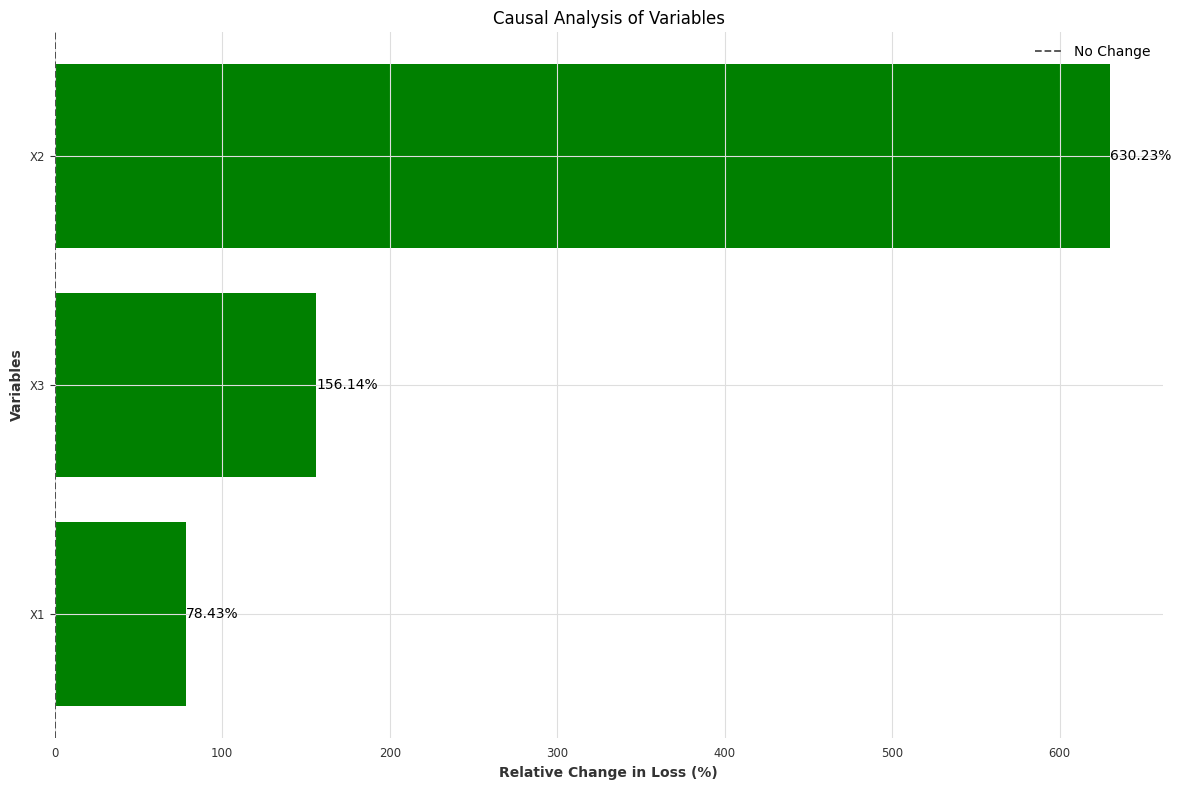


Detailed Results:
variable  testdiff  real_loss  shuffled_loss  relative_change
      X1  1.483330   0.041806       0.074595        78.432113
      X3  1.450844   0.041806       0.107081       156.137225
      X2  1.252643   0.041806       0.305282       630.232818

First loss: 1.5579
Real loss: 0.0418
Improvement: 97.32%


In [31]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_causal_analysis(pivm_results, firstloss, realloss, significance):
    df = pd.DataFrame(list(pivm_results.items()), columns=['variable', 'testdiff'])
    df['real_loss'] = realloss
    df['shuffled_loss'] = firstloss - df['testdiff']
    
    # Calculate relative change instead of absolute difference
    df['relative_change'] = (df['shuffled_loss'] - realloss) / realloss * 100
    
    # Sort by relative change
    df = df.sort_values('relative_change', ascending=True)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Use relative change for visualization
    bars = ax.barh(df['variable'], df['relative_change'], 
                   color=df['relative_change'].map(lambda x: 'green' if x > 0 else 'red'))

    ax.set_xlabel('Relative Change in Loss (%)')
    ax.set_ylabel('Variables')
    ax.set_title('Causal Analysis of Variables')

    # Add a vertical line at 0%
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.7, label='No Change')

    # Add text annotations
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}%', 
                ha='left' if width >= 0 else 'right', va='center')

    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nDetailed Results:")
    print(df.to_string(index=False))
    print(f"\nFirst loss: {firstloss:.4f}")
    print(f"Real loss: {realloss:.4f}")
    print(f"Improvement: {(firstloss - realloss) / firstloss * 100:.2f}%")

# Call the function with your data
visualize_causal_analysis(pivm_results, firstloss, realloss, significance)

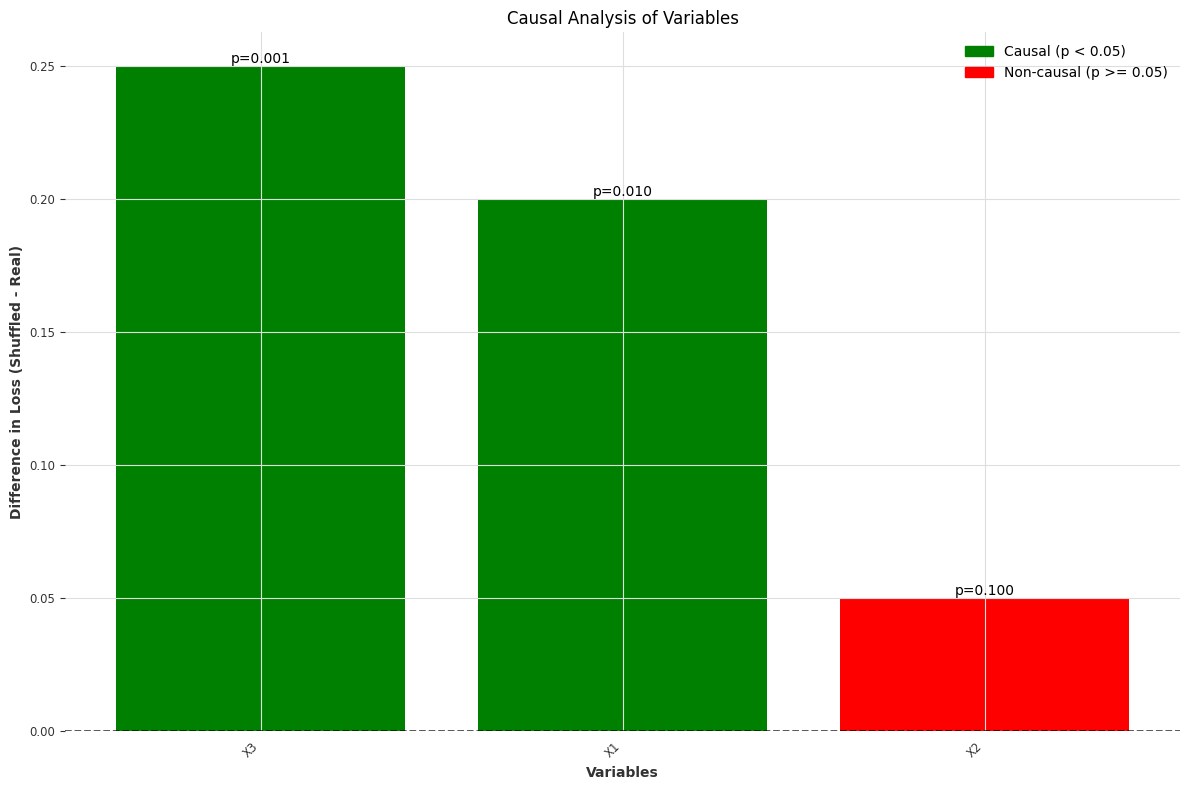

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_causal_analysis(results, threshold=0.05):
    # Convert results to a DataFrame for easier manipulation
    df = pd.DataFrame(results)
    
    # Sort by the difference between shuffled and real loss
    df['loss_diff'] = df['shuffled_loss_mean'] - df['real_loss']
    df = df.sort_values('loss_diff', ascending=False)
    
    # Create a color map based on causality
    colors = ['green' if p < threshold else 'red' for p in df['p_value']]
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the bars
    bars = ax.bar(df['variable'], df['loss_diff'], color=colors)
    
    # Add a horizontal line for the threshold
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    
    # Customize the plot
    ax.set_xlabel('Variables')
    ax.set_ylabel('Difference in Loss (Shuffled - Real)')
    ax.set_title('Causal Analysis of Variables')
    plt.xticks(rotation=45, ha='right')
    
    # Add a legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', edgecolor='green', label='Causal (p < 0.05)'),
                       Patch(facecolor='red', edgecolor='red', label='Non-causal (p >= 0.05)')]
    ax.legend(handles=legend_elements, loc='upper right')
    
    # Add text annotations for p-values
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'p={df["p_value"].iloc[i]:.3f}',
                ha='center', va='bottom', rotation=0)
    
    plt.tight_layout()
    plt.show()

# Example usage:
results = [
    {"variable": "X1", "real_loss": 0.1, "shuffled_loss_mean": 0.3, "shuffled_loss_std": 0.05, "p_value": 0.01},
    {"variable": "X2", "real_loss": 0.2, "shuffled_loss_mean": 0.25, "shuffled_loss_std": 0.03, "p_value": 0.1},
    {"variable": "X3", "real_loss": 0.15, "shuffled_loss_mean": 0.4, "shuffled_loss_std": 0.06, "p_value": 0.001},
    # Add more variables as needed
]

plot_causal_analysis(results)

In [6]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
%tensorboard --logdir logs1

UsageError: Line magic function `%tensorboard` not found.


In [16]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import math

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, nhead, num_layers, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=64, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, output_dim)

    def forward(self, src):
        src = self.encoder(src)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = self.decoder(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

# Prepare data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(covariates.values())
y = scaler_y.fit_transform(target.values().reshape(-1, 1))

X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).unsqueeze(1)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test).unsqueeze(1)
y_test_tensor = torch.FloatTensor(y_test)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize model
model = TimeSeriesTransformer(input_dim=X_train.shape[1], output_dim=1, d_model=64, nhead=4, num_layers=2)

# Training
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Prediction
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = scaler_y.inverse_transform(y_pred.numpy())
    y_test = scaler_y.inverse_transform(y_test)

# PIVM
def pivm(model, X, y, column_index, significance=0.8):
    X_shuffled = X.clone()
    X_shuffled[:, :, column_index] = X_shuffled[:, :, column_index][torch.randperm(X_shuffled.size(0))]
    
    with torch.no_grad():
        y_pred_original = model(X)
        y_pred_shuffled = model(X_shuffled)
    
    mse_original = nn.MSELoss()(y_pred_original, y)
    mse_shuffled = nn.MSELoss()(y_pred_shuffled, y)
    
    return mse_shuffled - mse_original > significance * mse_original

validated_covariates = []
for i in range(X_test_tensor.shape[2]):
    if pivm(model, X_test_tensor, y_test_tensor, i):
        validated_covariates.append(covariates.columns[i])

print("Validated covariates:", validated_covariates)

/Users/florisschouw/.pyenv/versions/3.10.14/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Users/florisschouw/.pyenv/versions/3.10.14/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/florisschouw/.pyenv/versions/3.10.14/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([28, 1])) that is different to the input size (to

Epoch [10/100], Loss: 1.1829
Epoch [20/100], Loss: 0.9176
Epoch [30/100], Loss: 0.9144
Epoch [40/100], Loss: 0.9931
Epoch [50/100], Loss: 1.2536
Epoch [60/100], Loss: 0.7193
Epoch [70/100], Loss: 1.0728
Epoch [80/100], Loss: 1.2764
Epoch [90/100], Loss: 1.2078
Epoch [100/100], Loss: 0.6956


ValueError: Found array with dim 3. None expected <= 2.